# Sea ice forecasting using IceNet

{bdg-primary}`Polar`
{bdg-secondary}`Modelling`
{bdg-warning}`Standard`
{bdg-info}`Python`

<p align="left">
    <a href="https://github.com/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/blob/main/LICENSE">
        <img alt="license" src="https://img.shields.io/badge/license-MIT-yellow.svg">
    </a>
    <a href="https://github.com/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/actions/workflows/render.yaml">
        <img alt="render" src="https://github.com/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/actions/workflows/render.yaml/badge.svg">
    </a>
    <a href="https://github.com/alan-turing-institute/environmental-ds-book/pull/6">
        <img alt="review" src="https://img.shields.io/badge/view-review-purple">
    </a>
    <br/>
</p>

<p align="left">
    <a href="http://mybinder.org/v2/gh/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/main?labpath=notebook.ipynb">
        <img alt="binder" src="https://mybinder.org/badge_logo.svg">
    </a>
    <a href="https://replay.notebooks.egi.eu/v2/gh/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/main?labpath=notebook.ipynb">
        <img alt="binder" src="https://img.shields.io/badge/launch-EGI%20binder-F5A252.svg?logo=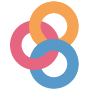">
    </a>
    <a href="https://us-central1-b.gcp.pangeo.io/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Feds-book-gallery%2Fac327c3a-5264-40a2-8c6e-1e8d7c4b37ef&urlpath=lab%2Ftree%2Fac327c3a-5264-40a2-8c6e-1e8d7c4b37ef%2Fnotebook.ipynb&branch=main">
        <img alt="jupyterhub" src="https://img.shields.io/static/v1.svg?logo=Jupyter&label=PangeoJupyterHub&message=2i2c&color=orange">
    </a>
    <br/>
</p>

<p align="left">
    <a href="https://w3id.org/ro-id/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef">
        <img alt="rohub" src="https://img.shields.io/badge/RoHub-FAIR_Executable_Research_Object-2ea44f?logo=Open+Access&logoColor=blue">
    </a>
    <a href="https://zenodo.org/badge/latestdoi/493604358">
        <img alt="doi" src="https://zenodo.org/badge/493604358.svg">
    </a>
</p>

## Context
### Purpose
Demonstrate IceNet, a deep learning sea ice forecasting system trained using climate simulations and observational data.

### Modelling approach
**IceNet** is a probabilistic, deep learning sea ice forecasting system. The model, an ensemble of U-Net networks, learns how sea ice changes from climate simulations and observational data to forecast up to 6 months of monthly-averaged sea ice concentration maps at 25 km resolution. IceNet advances the range of accurate sea ice forecasts, outperforming a state-of-the-art dynamical model in seasonal forecasts of summer sea ice, particularly for extreme sea ice events. IceNet was implemented in Python 3.7 using TensorFlow v2.2.0. Further details can be found in the Nature Communications paper [*Seasonal Arctic sea ice forecasting with probabilistic deep learning*](https://www.nature.com/articles/s41467-021-25257-4).

### Highlights
* Clone and access IceNet's codebase to produce seasonal Arctic sea ice forecasts using 3 out of 25 five pre-trained IceNet models [downloaded from the Polar Data Centre](https://doi.org/10.5285/71820e7d-c628-4e32-969f-464b7efb187c).
* Forecast a single year, 2020, using IceNet's preprocessed environmental input data downloaded from a Zenodo repository.
* Visualise IceNet’s seasonal ice edge predictions at 4- to 1-month lead times.
* Interactive plots comparing IceNet predictions against ECMWF SEAS5 physics-based sea ice concentration and a linear trend statistical benchmark.

### Contributions

#### Notebook
* Alejandro Coca-Castro (author), The Alan Turing Institute, [@acocac](https://github.com/acocac)
* Tom R. Andersson (reviewer), British Antarctic Survey, [@tom-andersson](https://github.com/tom-andersson)
* Nick Barlow (reviewer), The Alan Turing Institute, [@nbarlowATI](https://github.com/nbarlowATI)

#### Modelling codebase
* Tom R. Andersson (author), British Antarctic Survey, [@tom-andersson](https://github.com/tom-andersson)
* James Byrne (contributor), British Antarctic Survey, [@JimCircadian](https://github.com/JimCircadian)
* Tony Phillips (contributor), British Antarctic Survey

#### Modelling publications
```{bibliography}
  :style: plain
  :list: bullet
  :filter: topic % "ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef"
```

#### Modelling funding
The IceNet project was supported by Wave 1 of The UKRI Strategic Priorities Fund under the EPSRC Grant EP/T001569/1, particularly the AI for Science’ theme within that grant and The Alan Turing Institute.

:::{note}
The notebook contributors acknowledge the IceNet developers for providing a fully reproducible and public code available at [https://github.com/tom-andersson/icenet-paper](https://github.com/tom-andersson/icenet-paper). Some snippets from IceNet's source code were adapted to this notebook.
:::

## Clone the IceNet GitHub repo

In [1]:
!git clone -q https://github.com/tom-andersson/icenet-paper.git notebook

## Install dependencies (only for the Pangeo JupyterHub)

In [2]:
import os

if os.environ['CONDA_DEFAULT_ENV'] == 'notebook':
    !pip -q install tensorflow
    !pip -q install scitools-iris

## Load libraries

In [3]:
# system
import sys
sys.path.insert(0, os.path.join(os.getcwd(), 'notebook', 'icenet'))

# data
import json
import pandas as pd
import numpy as np
import xarray as xr

# custom functions from the icenet repo
from utils import IceNetDataLoader, create_results_dataset_index, arr_to_ice_edge_arr

# modelling
from tensorflow.keras.models import load_model

# plotting
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.offsetbox import AnchoredText

import holoviews as hv

import hvplot.pandas
import hvplot.xarray

from bokeh.models.formatters import DatetimeTickFormatter

import panel as pn
pn.extension()

# utils
import urllib.request
import re
from tqdm.notebook import tqdm
import calendar
from pprint import pprint
import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_columns = 10
hv.extension('bokeh', width=100)

## Set project structure

Let's follow the structure of the IceNet paper as it is indicated in the source code [config.py](https://github.com/tom-andersson/icenet-paper/blob/main/icenet/config.py) file. The structure allows conveniently using IceNet's custom data loader.

In [4]:
# data folder
data_folder = './data'
notebook_folder = './notebook'

config = {
    'obs_data_folder': os.path.join(data_folder, 'obs'),
    'mask_data_folder': os.path.join(data_folder, 'masks'),
    'forecast_data_folder': os.path.join(data_folder, 'forecasts'),
    'network_dataset_folder': os.path.join(data_folder, 'network_datasets'),
    'dataloader_config_folder': os.path.join(data_folder, 'dataloader_configs'),
    'network_h5_files_folder': os.path.join(data_folder, 'networks'),
    'forecast_results_folder': os.path.join(data_folder, 'results'),
}

# Generate the folder structure through a list of comprehension
[os.makedirs(val) for key, val in config.items() if not os.path.exists(val)]

[None, None, None, None, None, None, None]

## Download input data and models

IceNet consists of 25 ensemble members i.e. models. For this demonstrator, we only download three of them to reduce computational cost (note that this will reduce performance compared with the full ensemble). We also fetch analysis-ready i.e. preprocessed data of climate observations, ground truth sea ice concentration (SIC) and a IceNet's project configuration file from a Zenodo repository. Finally, we call a script from the IceNet paper repo to generate masks required for computing metrics and visualisation.

### Download pretrained IceNet models

Let's download 3 out of 25 ensemble members [retrieved from the Polar Data Centre](https://doi.org/10.5285/71820e7d-c628-4e32-969f-464b7efb187c). The models are numbered from 36 to 60. For this example we use the networks 36, 42 and 53. It is worth to mention other pre-computed results from the Nature Communications paper can be downloaded including output results table, uncertainty, netCDF forecast of the 25 ensemble members, among others.

In [5]:
url = 'https://ramadda.data.bas.ac.uk/repository/entry/get/'

target_networks = [36, 42, 53]

for network in target_networks:
    urllib.request.urlretrieve(url + f'network_tempscaled_{network}.h5?entryid=synth%3A71820e7d-c628-4e32-969f-464b7efb187c%3AL25ldXJhbF9uZXR3b3JrX21vZGVsL25ldHdvcmtfdGVtcHNjYWxlZF8zNi5oNQ%3D%3D',
                               os.path.join(config['network_h5_files_folder'],f'network_tempscaled_{network}.h5'))

### Download ERA5 data (climate observations)

Let's download analysis-ready i.e. preprocessed ERA5 observations from a zenodo repository.

:::{note}
The analysis-ready data were generated by running the script `python3 icenet/preproc_icenet_data.py` in step **3.2) Preprocess the raw data** according to the [icenet-paper repository](https://github.com/tom-andersson/icenet-paper). The scripts normalise the raw NetCDF data, downloaded using the bash file `./download_era5_data_in_parallel.sh` (see the step **2) Download data**), and saves it as monthly `NumPy` files.
:::

In [6]:
filename = 'dataset1.zip'
url = f'https://zenodo.org/record/5516869/files/{filename}?download=1'

if not os.path.isfile(config['network_dataset_folder'] + '/dataset1.zip') or os.path.getsize(config['network_dataset_folder'] + '/dataset1.zip') == 0:
    urllib.request.urlretrieve(url, config['network_dataset_folder'] + '/dataset1.zip')
    !unzip -qq ./data/network_datasets/dataset1.zip -d ./data/network_datasets

### Download ground truth SIC

We additionally download analysis-ready i.e. ground truth SIC data from a zenodo repository.

:::{note}
The analysis-ready ground truth SIC data were generated by running the script `python3 icenet/download_sic_data.py` in step **2) Download data** according to the [icenet-paper repository](https://github.com/tom-andersson/icenet-paper). The script downloads and concatenate [OSI-SAF SIC data](https://osisaf-hl.met.no/v2p1-sea-ice-index), OSI-450 (1979-2015) and OSI-430-b (2016-ownards), and saves it as monthly averages in a `netCDF` file.
:::

In [7]:
filename = 'siconca_EASE.nc'
url = f'https://zenodo.org/record/5516869/files/{filename}?download=1'

if not os.path.isfile(filename) or os.path.getsize(filename) == 0:
    urllib.request.urlretrieve(url, config['obs_data_folder'] + '/' + filename)

### Download mask

The script `icenet/gen_masks.py` generates masks for land, the polar holes, OSI-SAF monthly maximum ice extent (the *active
grid cell region*), and the Arctic regions & coastline. Figures of the
masks are saved in the **./figures** folder.

In [8]:
!python notebook/icenet/gen_masks.py

Generating active grid cell region & and masks

Generating NSIDC Arctic sea region array

/home/jovyan/notebook/icenet/gen_masks.py:134: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  sic_EASE_cube = iris.load_cube(sic_day_fpath, 'sea_ice_area_fraction')
/home/jovyan/notebook/icenet/gen_masks.py:134: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  sic_EASE_cube = iris.load_cube(sic_day_fpath, 'sea_ice_area_fraction')
/home/jovyan/notebook/icenet/gen_masks.py:134: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the i

## Data loader

The following lines show how to download and read a given IceNet's configuration `JSON` file into a custom loader, **IceNetDataLoader**. The loader conveniently dictates which variables are input to the networks, which climate simulations are used for pre-training, and how far ahead to forecast.

In [9]:
dataloader_ID = '2021_09_03_1300_icenet_demo.json'
url = f'https://zenodo.org/record/5516869/files/{dataloader_ID}?download=1'

if not os.path.isfile(config['dataloader_config_folder'] + '/' + dataloader_ID) or os.path.getsize(config['dataloader_config_folder'] + '/' + dataloader_ID) == 0:
    urllib.request.urlretrieve(url, config['dataloader_config_folder'] + '/' + dataloader_ID)

with open(config['dataloader_config_folder'] + '/' + dataloader_ID, 'r') as readfile:
    dataloader_config = json.load(readfile)

pprint(dataloader_config['input_data'])

{'circmonth': {'include': True, 'metadata': True},
 'land': {'include': True, 'metadata': True},
 'psl': {'abs': {'include': False, 'max_lag': 3},
         'anom': {'include': True, 'max_lag': 3}},
 'rsds': {'abs': {'include': False, 'max_lag': 3},
          'anom': {'include': True, 'max_lag': 3}},
 'rsus': {'abs': {'include': False, 'max_lag': 3},
          'anom': {'include': True, 'max_lag': 3}},
 'siconca': {'abs': {'include': True, 'max_lag': 12},
             'anom': {'include': False, 'max_lag': 3},
             'linear_trend': {'include': True}},
 'ta500': {'abs': {'include': False, 'max_lag': 3},
           'anom': {'include': True, 'max_lag': 3}},
 'tas': {'abs': {'include': False, 'max_lag': 3},
         'anom': {'include': True, 'max_lag': 3}},
 'tos': {'abs': {'include': False, 'max_lag': 3},
         'anom': {'include': True, 'max_lag': 3}},
 'ua10': {'abs': {'include': True, 'max_lag': 3},
          'anom': {'include': False, 'max_lag': 3}},
 'uas': {'abs': {'include': 

The `input_data` element of the IceNet's `JSON` file lists input variables and corresponding settings. We use the same input data as in the Nature Communications paper which consists of SIC, 11 climate variables, statistical SIC forecasts, and metadata (see [Supplementary Table 2](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-25257-4/MediaObjects/41467_2021_25257_MOESM1_ESM.pdf)). These layers are stacked in an identical manner to the RGB channels of a traditional image, amounting to 50 channels in total.

In [10]:
# Load dataloader
dataloader_config_fpath = os.path.join(config['dataloader_config_folder'], dataloader_ID)

# Data loader
print("\nSetting up the data loader with config file: {}\n\n".format(dataloader_ID))
dataloader = IceNetDataLoader(dataloader_config_fpath)
print('\n\nDone.\n')


Setting up the data loader with config file: 2021_09_03_1300_icenet_demo.json




Done.



## Load networks

Let's also load the ensemble IceNet's members using the `load_model` function imported from Keras API with Tensorflow backend.

In [11]:
network_regex = re.compile('^network_tempscaled_([0-9]*).h5$')

network_fpaths = [os.path.join(config['network_h5_files_folder'], f) for f in
                      sorted(os.listdir(config['network_h5_files_folder'])) if network_regex.match(f)]

ensemble_seeds = [network_regex.match(f)[1] for f in
                  sorted(os.listdir(config['network_h5_files_folder'])) if network_regex.match(f)]

networks = []
for network_fpath in network_fpaths:
    print('Loading model from {}... '.format(network_fpath), end='', flush=True)
    networks.append(load_model(network_fpath, compile=False))
    print('Done.')

Loading model from ./data/networks/network_tempscaled_36.h5... 

2024-03-12 11:11:31.411371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-12 11:11:31.411409: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-12 11:11:31.411437: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d2d633f33b8b): /proc/driver/nvidia/version does not exist
2024-03-12 11:11:31.411688: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done.
Loading model from ./data/networks/network_tempscaled_42.h5... Done.
Loading model from ./data/networks/network_tempscaled_53.h5... Done.


## Modelling

### Forecast settings
Now let's set the target model and forecast dates, start `forecast_start` (Jan 2020) and end `forecast_end` (Dec 2020). We also extract the number of forecast months from the IceNet's custom dataloader.

In [12]:
model = 'IceNet'

forecast_start = pd.Timestamp('2020-01-01')
forecast_end = pd.Timestamp('2020-12-01')

n_forecast_months = dataloader.config['n_forecast_months']
print('\n# of forecast months: {}\n'.format(n_forecast_months))


# of forecast months: 6



### Set up forecast folder

In [13]:
forecast_folder = os.path.join(config['forecast_data_folder'], 'icenet', dataloader_ID, model)

if not os.path.exists(forecast_folder):
    os.makedirs(forecast_folder)

### Load ground truth SIC

In [14]:
print('Loading ground truth SIC... ', end='', flush=True)
true_sic_fpath = os.path.join(config['obs_data_folder'], 'siconca_EASE.nc')
true_sic_da = xr.open_dataarray(true_sic_fpath)
print('Done.')

Loading ground truth SIC... Done.


### Set up forecast DataArray dictionary

Now we are setting up an empty `xarray DataArray` object that we will use to store IceNet's forecasts. `DataArrays` let you conveniently handle, query and visualise spatio-temporal data, such as the forecast predictions generated by the IceNet system.

In [15]:
# define list of lead times
leadtimes = np.arange(1, n_forecast_months+1)

# add ensemble to the list of models
ensemble_seeds_and_mean = ensemble_seeds.copy()
ensemble_seeds_and_mean.append('ensemble')

all_target_dates = pd.date_range(
    start=forecast_start,
    end=forecast_end,
    freq='MS'
)

all_start_dates = pd.date_range(
    start=forecast_start - pd.DateOffset(months=n_forecast_months-1),
    end=forecast_end,
    freq='MS'
)

shape = (len(all_target_dates),
         *dataloader.config['raw_data_shape'],
         n_forecast_months)

coords = {
    'time': all_target_dates,  # To be sliced to target dates
    'yc': true_sic_da.coords['yc'],
    'xc': true_sic_da.coords['xc'],
    'lon': true_sic_da.isel(time=0).coords['lon'],
    'lat': true_sic_da.isel(time=0).coords['lat'],
    'leadtime': leadtimes,
    'seed': ensemble_seeds_and_mean,
    'ice_class': ['no_ice', 'marginal_ice', 'full_ice']
}

# Probabilistic SIC class forecasts
dims = ('seed', 'time', 'yc', 'xc', 'leadtime', 'ice_class')
shape = (len(ensemble_seeds_and_mean), *shape, 3)

model_forecast = xr.DataArray(
    data=np.zeros(shape, dtype=np.float32),
    coords=coords,
    dims=dims
)

### Build up forecasts

In this step, we generate IceNet's forecast for the target period and write it into the empty `DataArrays` object. IceNet’s outputs are forecasts of three sea ice concentration (SIC) classes: open-water (SIC ≤ 15%), marginal ice (15% < SIC < 80%) and full ice (SIC ≥ 80%) for the following 6 months in the form of discrete probability distributions at each grid cell.

In [16]:
for start_date in tqdm(all_start_dates):

    # Target forecast dates for the forecast beginning at this `start_date`
    target_dates = pd.date_range(
        start=start_date,
        end=start_date + pd.DateOffset(months=n_forecast_months-1),
        freq='MS'
    )

    X, y, sample_weights = dataloader.data_generation([start_date])
    mask = sample_weights > 0
    pred = np.array([network.predict(X)[0] for network in networks])
    pred *= mask  # mask outside active grid cell region to zero
    # concat ensemble mean to the set of network predictions
    ensemble_mean_pred = pred.mean(axis=0, keepdims=True)
    pred = np.concatenate([pred, ensemble_mean_pred], axis=0)

    for i, (target_date, leadtime) in enumerate(zip(target_dates, leadtimes)):
        if target_date in all_target_dates:
                model_forecast.\
                    loc[:, target_date, :, :, leadtime] = pred[..., i]
                
print('Saving forecast NetCDF for {}... '.format(model), end='', flush=True)

forecast_fpath = os.path.join(forecast_folder, f'{model.lower()}_forecasts.nc'.format(model.lower()))
model_forecast.to_netcdf(forecast_fpath) #export file as Net

print('Done.')

  0%|          | 0/17 [00:00<?, ?it/s]

2024-03-12 11:11:33.347524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Saving forecast NetCDF for IceNet... Done.


## Results

### Settings

The IceNet codebase allows computing operations in the memory or with `dask`. The computation in dask is optimal for predicting longer target periods (see further info in [icenet/analyse_heldout_predictions.py](https://github.com/tom-andersson/icenet-paper/blob/27ca44694eaa3cb5f02fd824c618c46a6701a301/icenet/analyse_heldout_predictions.py#L23)). The following lines show how to compute in the memory.

### Setup

In [17]:
metric_compute_list = ['Binary accuracy', 'SIE error']

forecast_fpath = os.path.join(forecast_folder, f'{model.lower()}_forecasts.nc'.format(model.lower()))

chunks = {'seed': 1}
icenet_forecast_da = xr.open_dataarray(forecast_fpath, chunks=chunks)
icenet_seeds = icenet_forecast_da.seed.values

### Monthly masks (active grid cell regions to compute metrics over)

In [18]:
mask_fpath_format = os.path.join(config['mask_data_folder'], 'active_grid_cell_mask_{}.npy')

month_mask_da = xr.DataArray(np.array(
    [np.load(mask_fpath_format.format('{:02d}'.format(month))) for
     month in np.arange(1, 12+1)],
))

### Download previous results

In [19]:
url = 'https://ramadda.data.bas.ac.uk/repository/entry/get/'
fn = '2021_07_01_183913_forecast_results.csv'
fn_suffix = '?entryid=synth%3A71820e7d-c628-4e32-969f-464b7efb187c%3AL3Jlc3VsdHMvZm9yZWNhc3RfcmVzdWx0cy8yMDIxXzA3XzAxXzE4MzkxM19mb3JlY2FzdF9yZXN1bHRzLmNzdg%3D%3D'

if not os.path.isfile(os.path.join(config['forecast_results_folder'],fn)):
    urllib.request.urlretrieve(url + fn + fn_suffix, os.path.join(config['forecast_results_folder'],fn))

### Initialise results dataframe

Now we write forecast results over a old results file generated for IceNet's nature communications paper. The old results file contains the performance of all 25 ensemble models,  ECMWF SEAS5 physics-based sea ice probability forecast and linear trend benchmark. For the purposes of this demonstrator, we remove the IceNet's ensemble records to replace with the performance of 3 assessed ensemble models.

In [20]:
now = pd.Timestamp.now()
new_results_df_fname = now.strftime('%Y_%m_%d_%H%M%S_forecast_results.csv')
new_results_df_fpath = os.path.join(config['forecast_results_folder'], new_results_df_fname)

print('New results will be saved to {}\n\n'.format(new_results_df_fpath))

results_df_fnames = sorted([f for f in os.listdir(config['forecast_results_folder']) if re.compile('.*.csv').match(f)])
if len(results_df_fnames) >= 1:
    old_results_df_fname = results_df_fnames[-1]
    old_results_df_fpath = os.path.join(config['forecast_results_folder'], old_results_df_fname)
    print('\n\nLoading previous results dataset from {}'.format(old_results_df_fpath))

# Load previous results, do not interpret 'NA' as NaN
results_df = pd.read_csv(old_results_df_fpath, keep_default_na=False, comment='#')

# Remove existing IceNet results
results_df = results_df[~results_df['Model'].str.startswith('IceNet')]

# Drop spurious index column if present
results_df = results_df.drop('Unnamed: 0', axis=1, errors='ignore')
results_df['Forecast date'] = [pd.Timestamp(date) for date in results_df['Forecast date']]

results_df = results_df.set_index(['Model', 'Ensemble member', 'Leadtime', 'Forecast date'])

# Add new models to the dataframe
multi_index = create_results_dataset_index([model], leadtimes, all_target_dates, model, icenet_seeds)
results_df = results_df.append(pd.DataFrame(index=multi_index)).sort_index()

New results will be saved to ./data/results/2024_03_12_111634_forecast_results.csv




Loading previous results dataset from ./data/results/2021_07_01_183913_forecast_results.csv


### Compute IceNet SIC

We obtain the sea ice probability (SIC>15%) for each ensemble member and ensemble mean by summing IceNet’s marginal ice (15%<SIC<80%) and full ice class (SIC>80%) probabilities.

In [21]:
icenet_sip_da = icenet_forecast_da.sel(ice_class=['marginal_ice', 'full_ice']).sum('ice_class')

### Ground truth SIC

Let's also load ground truth SIC which was already preprocessed and generated from .

In [22]:
true_sic_fpath = os.path.join(config['obs_data_folder'], 'siconca_EASE.nc')
true_sic_da = xr.open_dataarray(true_sic_fpath, chunks={})
true_sic_da = true_sic_da.load()
true_sic_da = true_sic_da.sel(time=all_target_dates)

if 'Binary accuracy' in metric_compute_list:
    binary_true_da = true_sic_da > 0.15

### Monthwise masks

As we are showing in the next section, the monthly masks, stacked into a `DataArrays` object, are relevant to compute metrics only in the active grid cell region.

In [23]:
months = [pd.Timestamp(date).month - 1 for date in all_target_dates]
mask_da = xr.DataArray(
    [month_mask_da[month] for month in months],
    dims=('time', 'yc', 'xc'),
    coords={
        'time': true_sic_da.time.values,
        'yc': true_sic_da.yc.values,
        'xc': true_sic_da.xc.values,
    }
)

### Compute performance metrics

To analyse the forecast performance, IceNet's researchers compute two metrics, `Binary accuracy` and `Sea Ice Extent (SIE) error`. The former is generated over an active grid cell region for a given calendar month and can be seen as a normalised version of the integrated ice edge error (IIEE) (see further information of the meaning in Methods in the IceNet's [*Nature communications*](https://www.nature.com/articles/s41467-021-25257-4) paper. The latter, SIE error, is the difference between the overpredicted area and the underpredicted area. Both metrics are complementary, being the binary accuracy more robust for assessing IceNet’s relative seasonal forecast skill for September.

In [24]:
print('Analysing forecasts: \n\n')

print('Computing metrics:')
print(metric_compute_list)

binary_forecast_da = icenet_sip_da > 0.5

compute_ds = xr.Dataset()
for metric in metric_compute_list:

    if metric == 'Binary accuracy':
        binary_correct_da = (binary_forecast_da == binary_true_da).astype(np.float32)
        binary_correct_weighted_da = binary_correct_da.weighted(mask_da)

        # Mean percentage of correct classifications over the active
        #   grid cell area
        ds_binacc = (binary_correct_weighted_da.mean(dim=['yc', 'xc']) * 100)
        compute_ds[metric] = ds_binacc

    elif metric == 'SIE error':
        binary_forecast_weighted_da = binary_forecast_da.astype(int).weighted(mask_da)
        binary_true_weighted_da = binary_true_da.astype(int).weighted(mask_da)

        ds_sie_error = (
            binary_forecast_weighted_da.sum(['xc', 'yc']) -
            binary_true_weighted_da.sum(['xc', 'yc'])
        ) * 25**2

        compute_ds[metric] = ds_sie_error

print('Writing to results dataset...')
for compute_da in iter(compute_ds.data_vars.values()):
    metric = compute_da.name

    compute_df_index = results_df.loc[
        pd.IndexSlice[model, :, leadtimes, all_target_dates], metric].\
        droplevel(0).index

    # Ensure indexes are aligned for assigning to results_df
    compute_df = compute_da.to_dataframe().reset_index().\
        set_index(['seed', 'leadtime', 'time']).\
        reindex(index=compute_df_index)

    results_df.loc[pd.IndexSlice[model, :, leadtimes, all_target_dates], metric] = \
        compute_df.values

print('\nCheckpointing results dataset... ', end='', flush=True)
results_df.to_csv(new_results_df_fpath)
print('Done.')

Analysing forecasts: 


Computing metrics:
['Binary accuracy', 'SIE error']
Writing to results dataset...

Checkpointing results dataset... Done.


## Analysis

In this section, we explore the forecast results and provide some interpretation. Note we use a small sample of the data so the results are only for demonstration purposes.

### Plot settings

In [25]:
settings_lineplots = dict(padding=0.1, height=400, width=700, fontsize={'title': '120%','labels': '120%', 'ticks': '100%'})

### Preprocess results dataset

In [26]:
# Reset index to preprocess results dataset
results_df = results_df.reset_index()

results_df['Forecast date'] = pd.to_datetime(results_df['Forecast date'])

month_names = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
forecast_month_names = month_names[results_df['Forecast date'].dt.month.values - 1]
results_df['Calendar month'] = forecast_month_names

results_df = results_df.set_index(['Model', 'Ensemble member', 'Leadtime', 'Forecast date'])

# subset target period
results_df = results_df.loc(axis=0)[pd.IndexSlice[:, :, :, slice(forecast_start, forecast_end)]]

results_df = results_df.sort_index()

Let's inspect the results `pandas data.frame` reporting the monthly performance of each ensemble member for the target period.

In [27]:
results_df.head()

Binary accuracy  SIE error  \
Model  Ensemble member Leadtime Forecast date                               
IceNet 36              1        2020-01-01           95.697038  -457500.0   
                                2020-02-01           97.435745  -180000.0   
                                2020-03-01           97.507057  -215625.0   
                                2020-04-01           96.977625   -39375.0   
                                2020-05-01           97.439646   -13750.0   

                                              Calendar month  
Model  Ensemble member Leadtime Forecast date                 
IceNet 36              1        2020-01-01               Jan  
                                2020-02-01               Feb  
                                2020-03-01               Mar  
                                2020-04-01               Apr  
                                2020-05-01               May

### Ice edge

The following figure shows a method to interactively plotting how **IceNet** updates its forecasts using new initial conditions as the lead time decreases, with the predicted ice edge approaching the true ice edge. The observed ice edge (in black) is defined as the sea ice concentration (SIC)=15% contour. IceNet’s predicted ice edge (in green) is determined from its sea ice probability forecast as the P(SIC>15%)=0.5 contour.

The dashboard (sliders + figure) is generated through the `panel` library, [an open-source Python library that lets you create custom interactive web apps and dashboards](https://panel.holoviz.org/index.html). In the settings below, we define two sliders which essentially allow us to interact with two variables, the month and lead time. 

In [28]:
# set target year 
year = 2020

# set sliders
month_name = [f'{calendar.month_name[m]} {year}' for m in list(range(1, 13))]

month_slider = pn.widgets.DiscreteSlider(name="Month", options=month_name, value='September 2020', width=200)

lead_slider = pn.widgets.IntSlider(name="Lead time (months)", start=1, end=4, step=1, value=4, direction='rtl', width=200)

::::{important}
The interactive figure below essentially reproduces [Figure 2](https://www.nature.com/articles/s41467-021-25257-4/figures/2) of the IceNet paper, however it covers a larger geographical extent i.e. in March when the ice edge extent is largest. Also, we visualise each month of the target period of this demonstrator (January to December 2020). Some script snippets were extracted from the IceNet script `python3 icenet/plot_paper_figures.py` (see [line 182](https://github.com/tom-andersson/icenet-paper/blob/main/icenet/plot_paper_figures.py)). Note we define alpha and colours for coastline and land mask object. These configurations allow overlapping these layers correctly to differentiate IceNet predictions and SIC ground truth.
::::


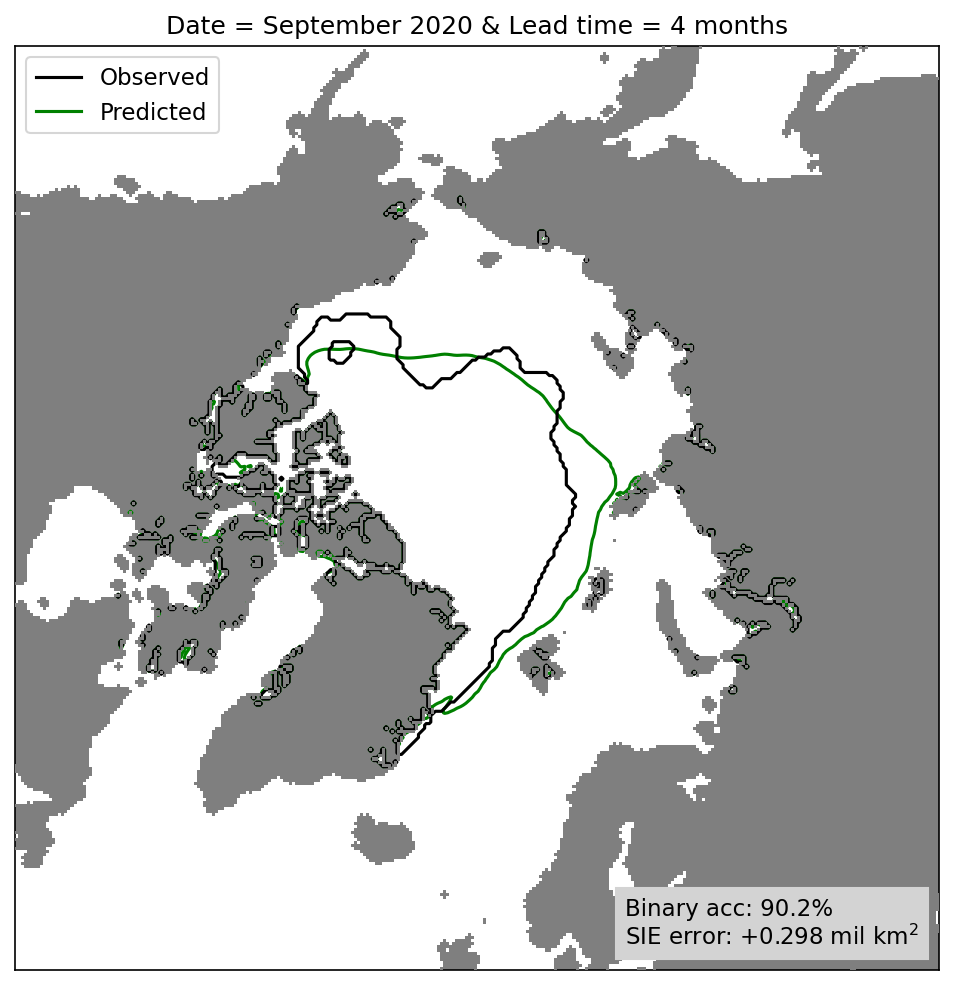
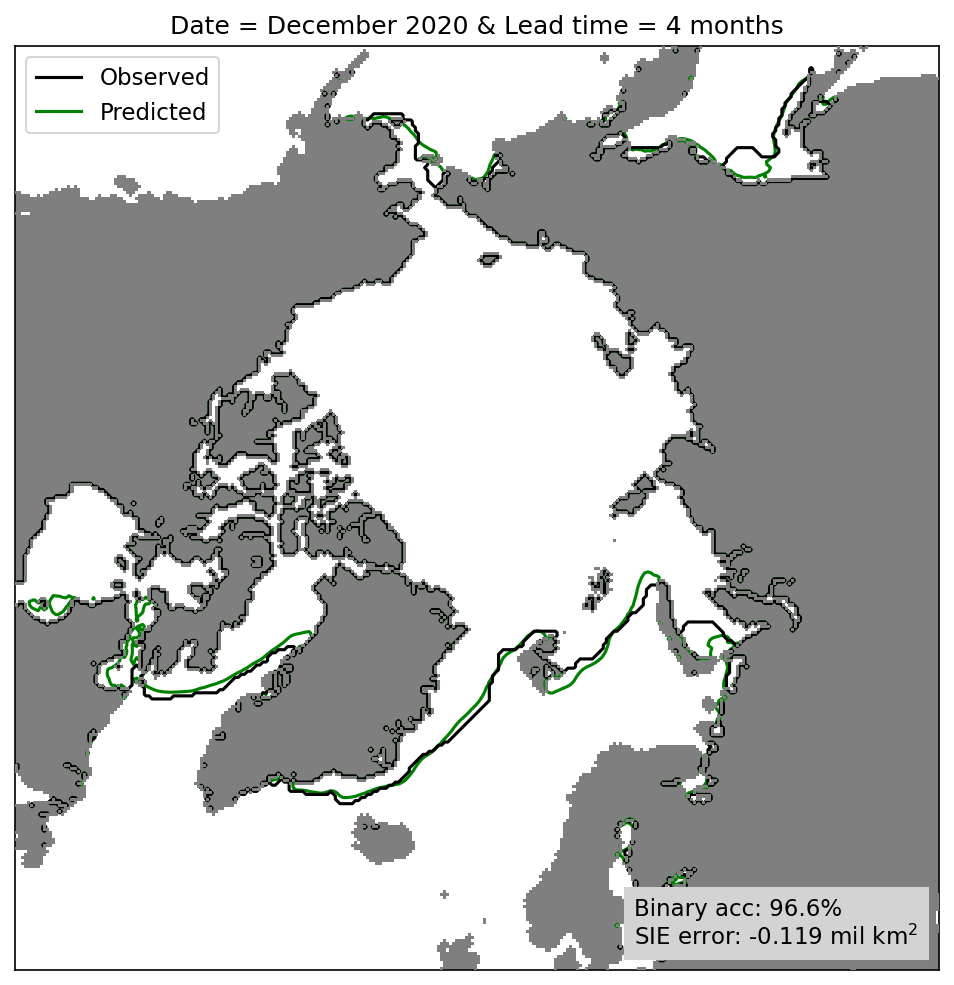
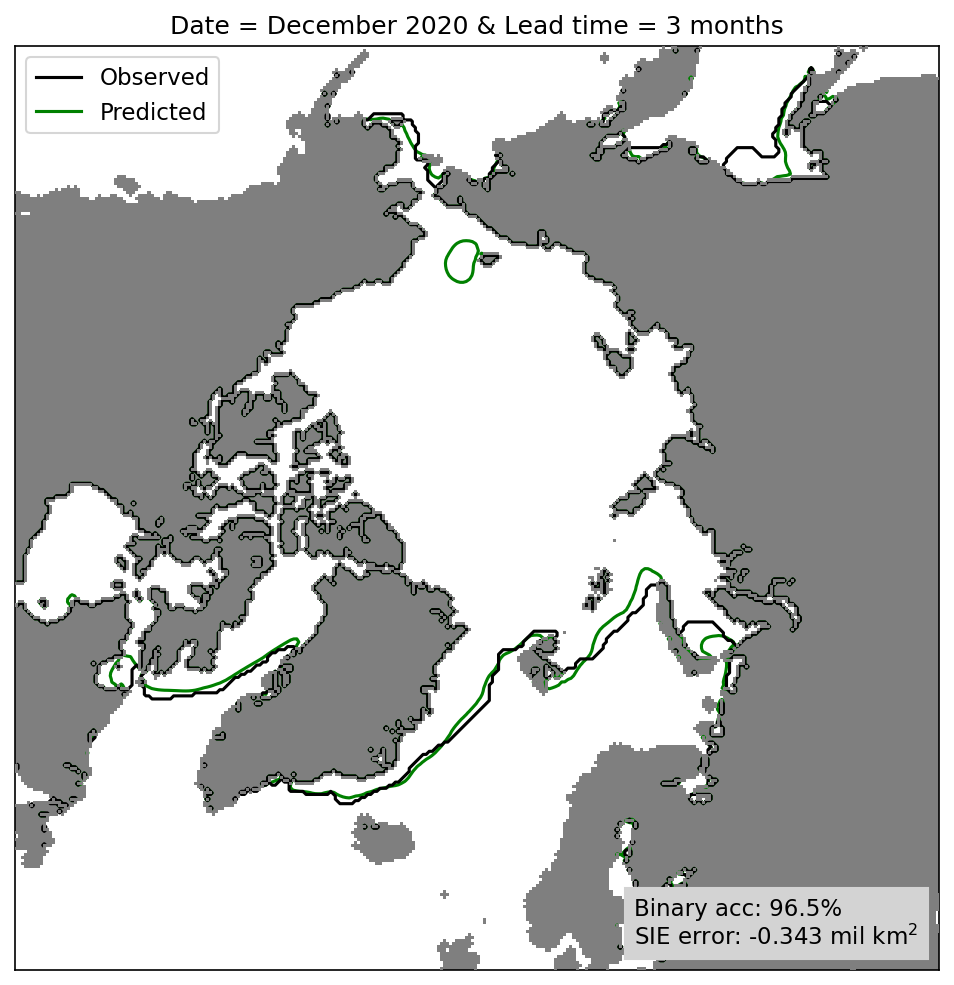
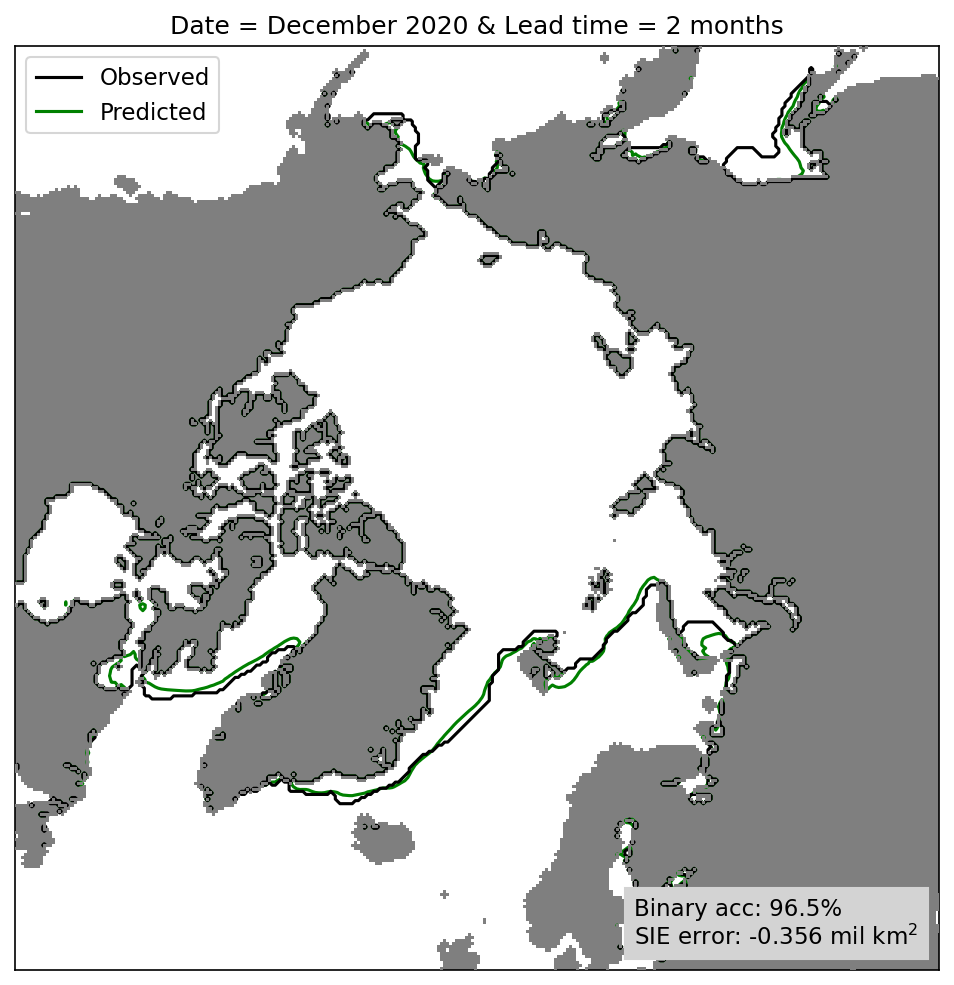
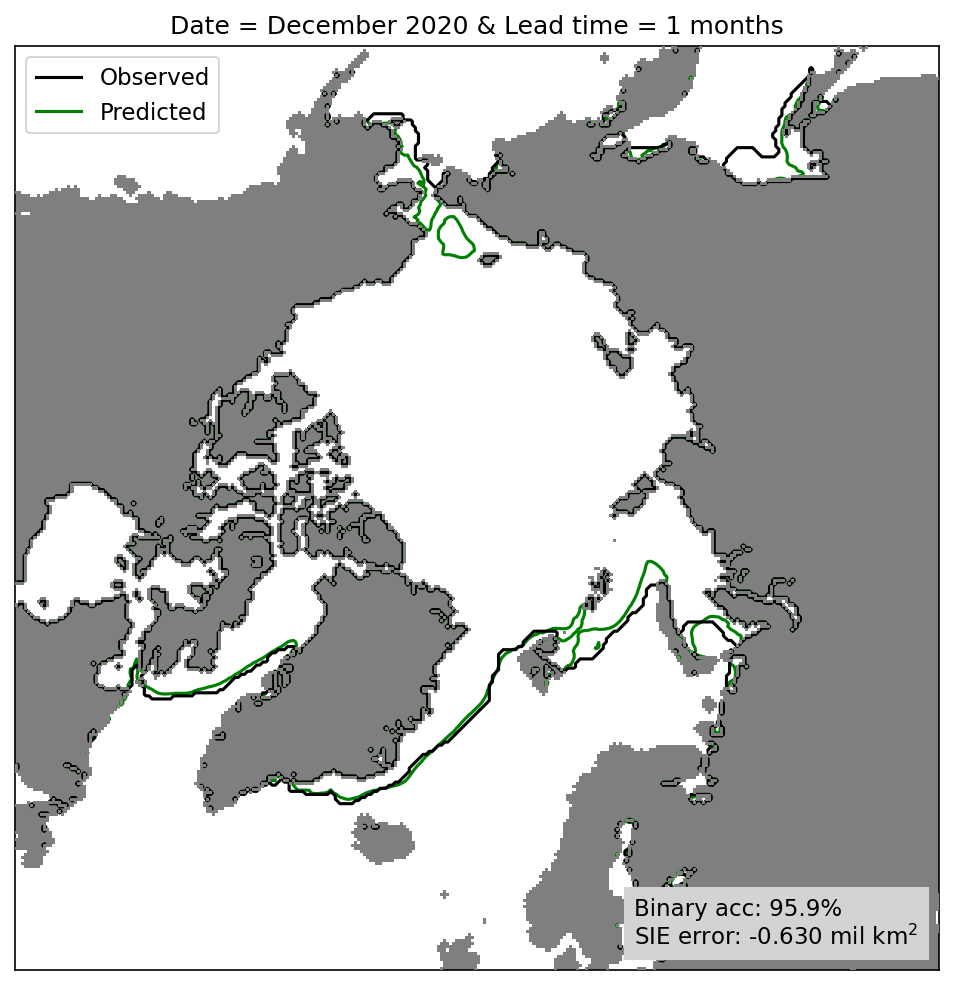
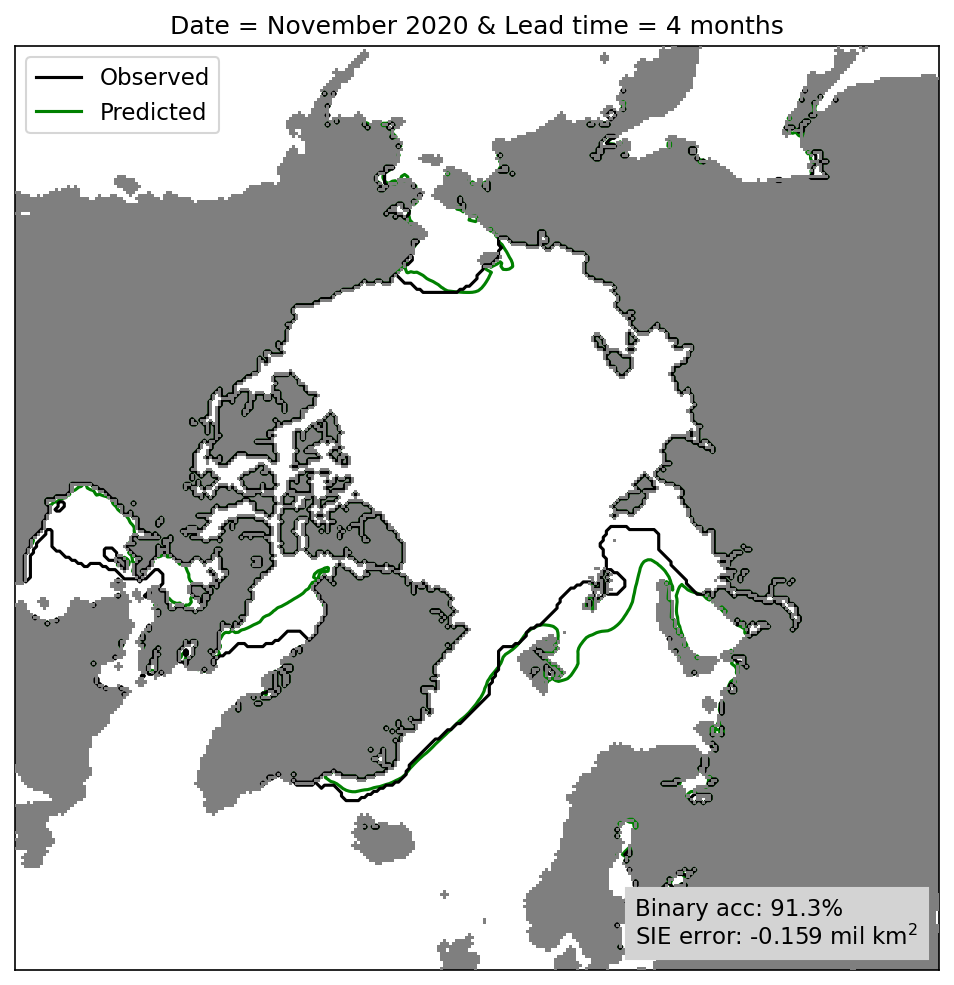
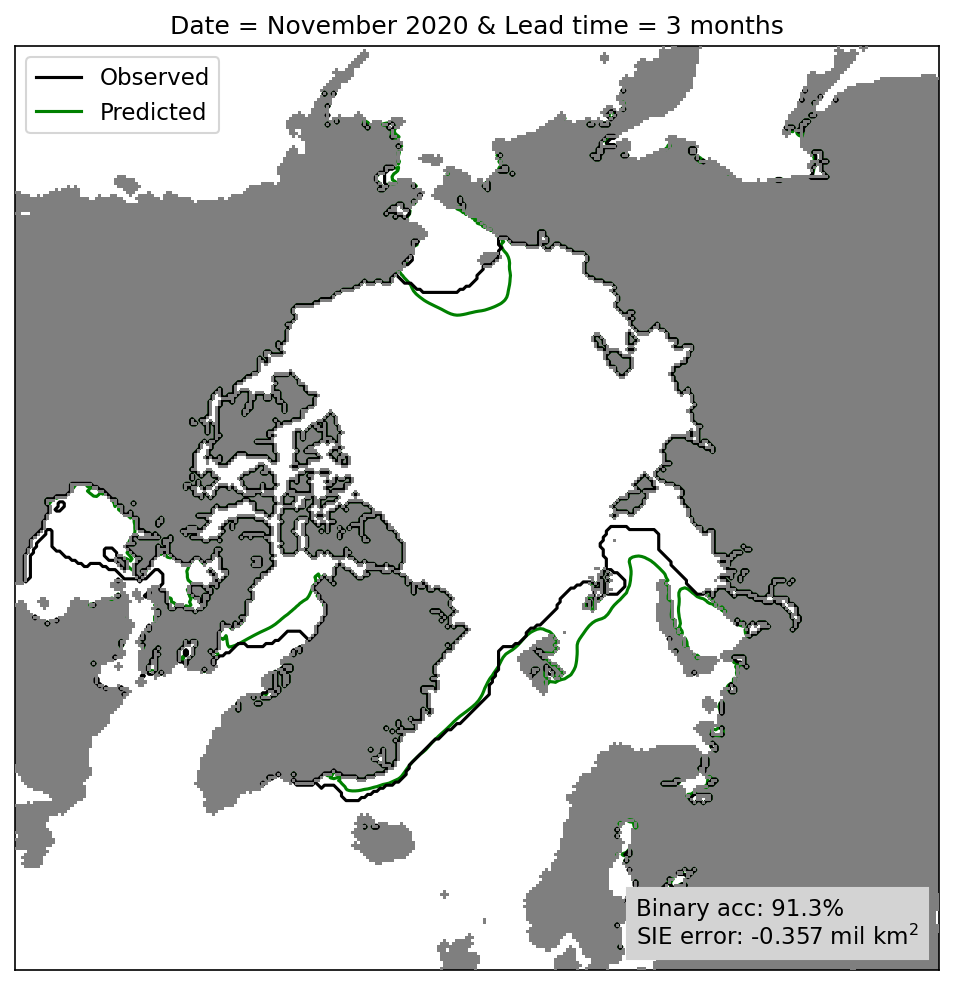
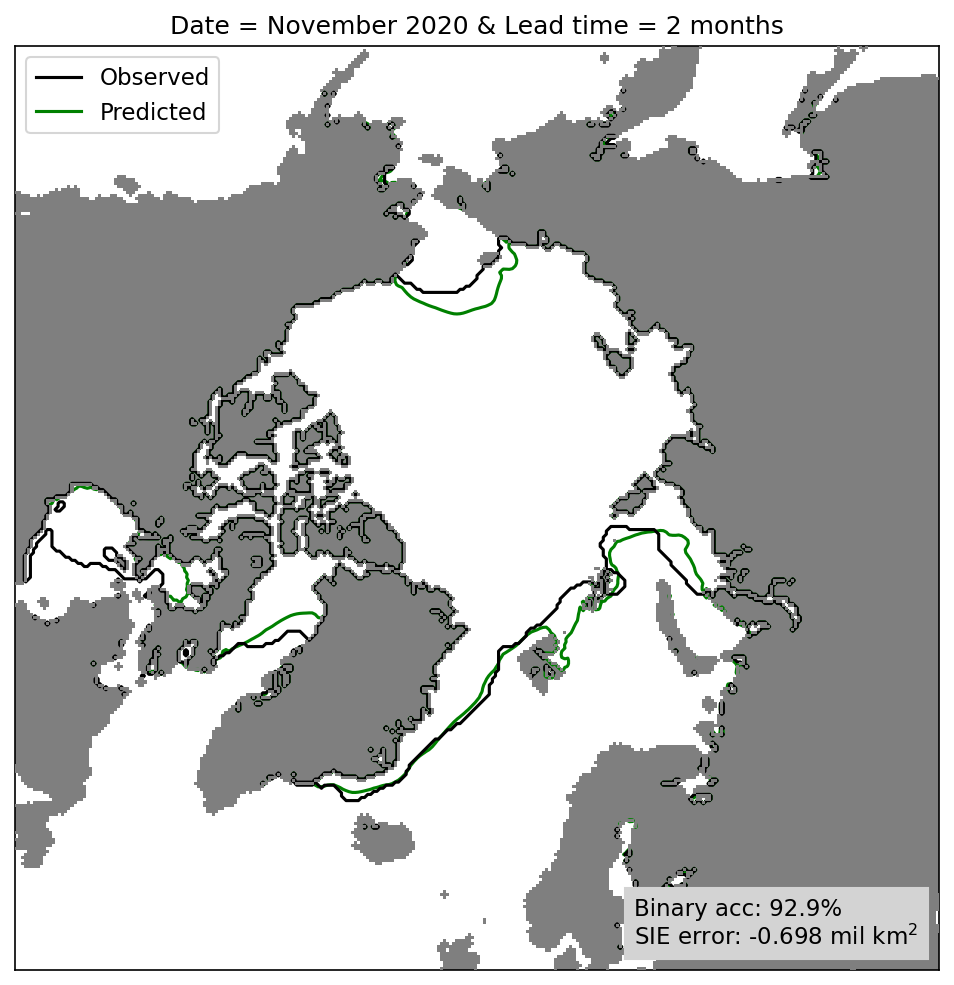
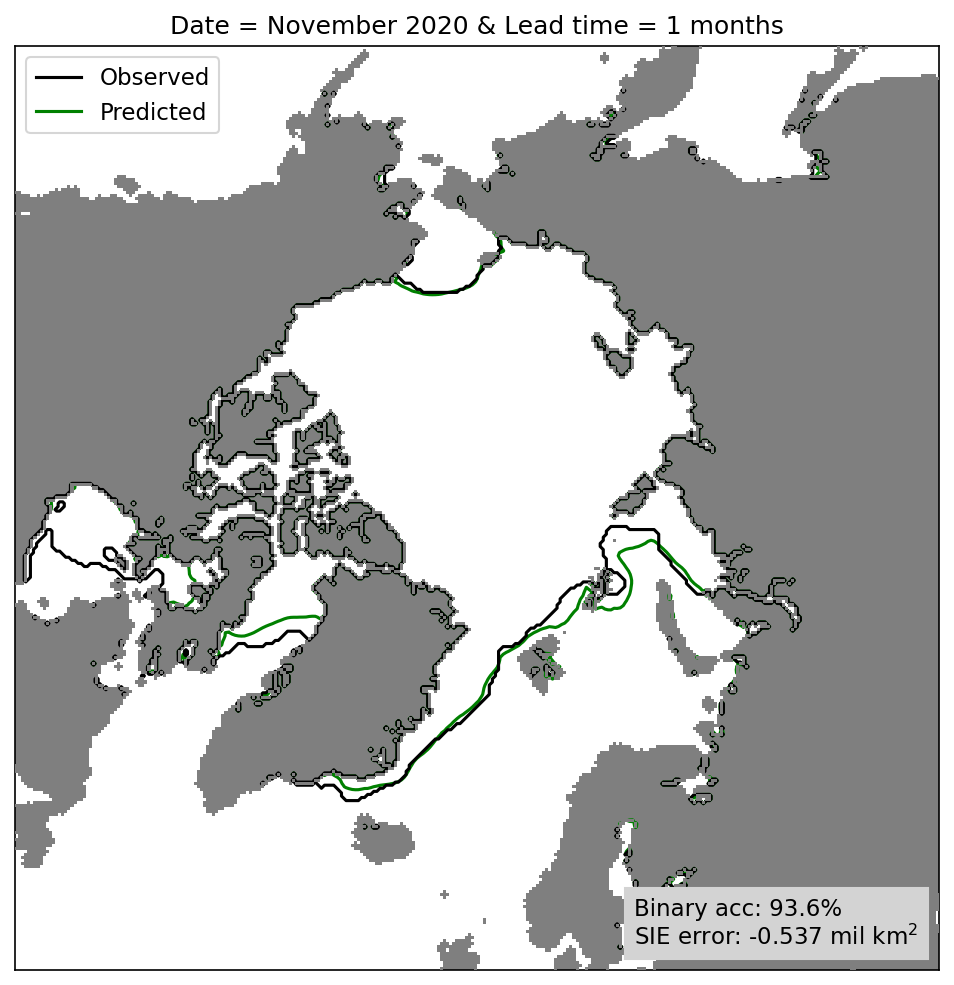
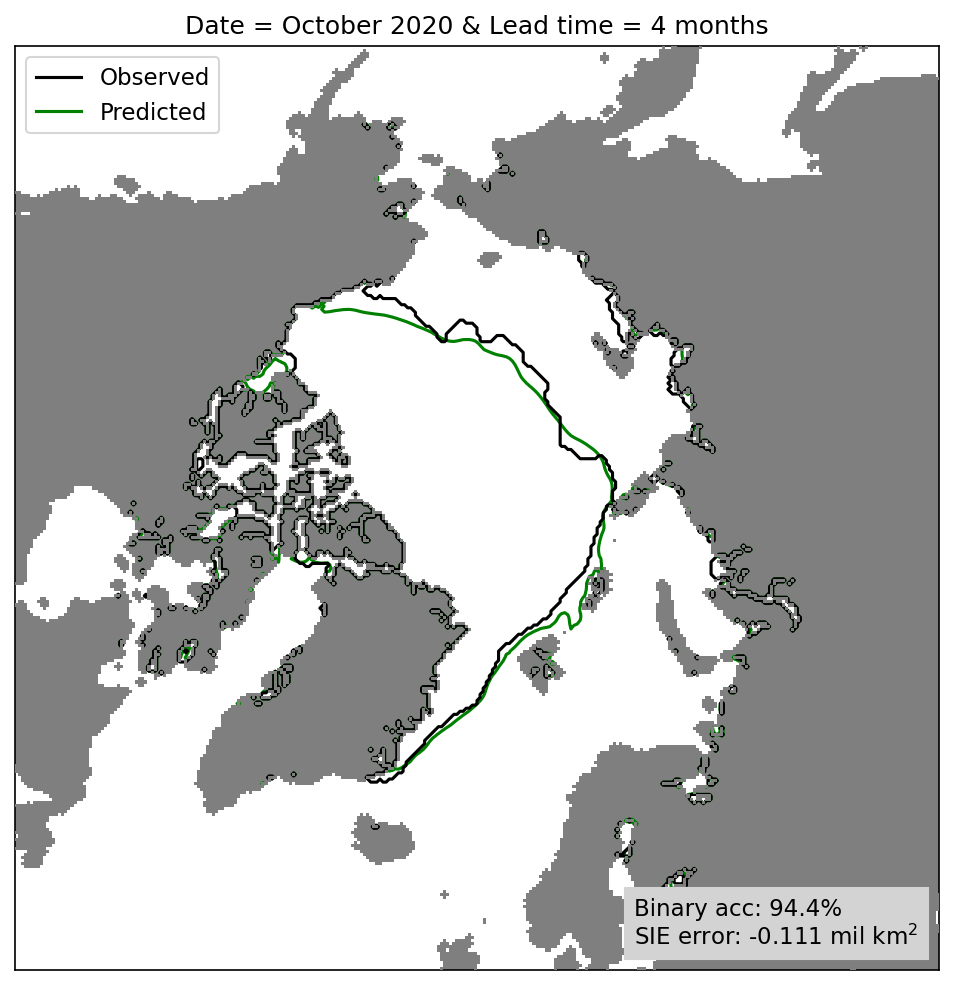
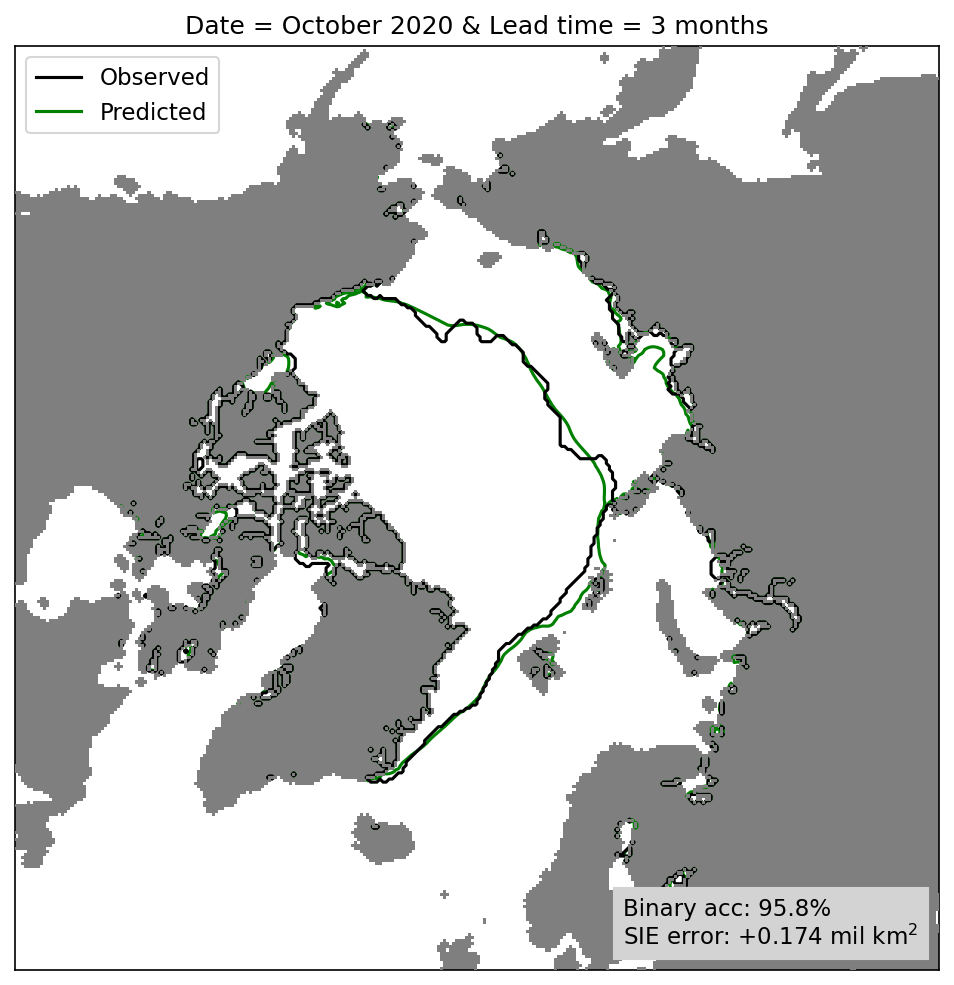
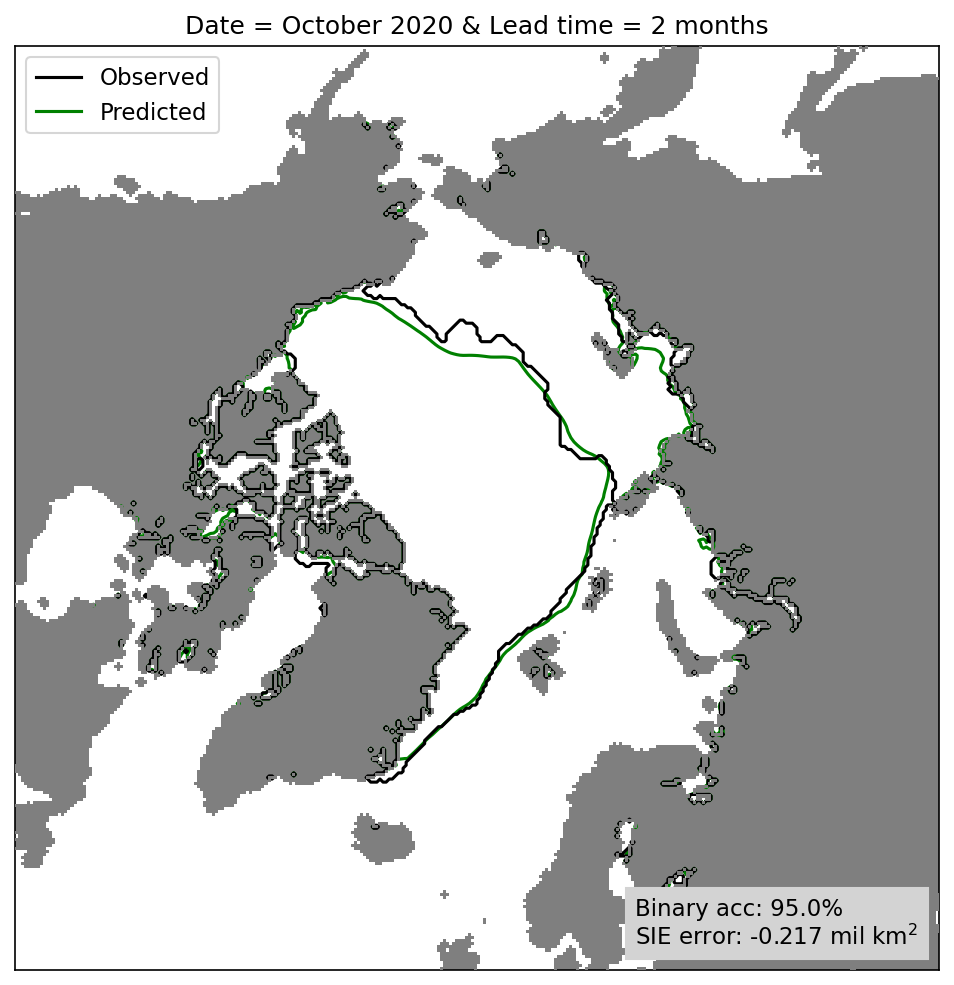
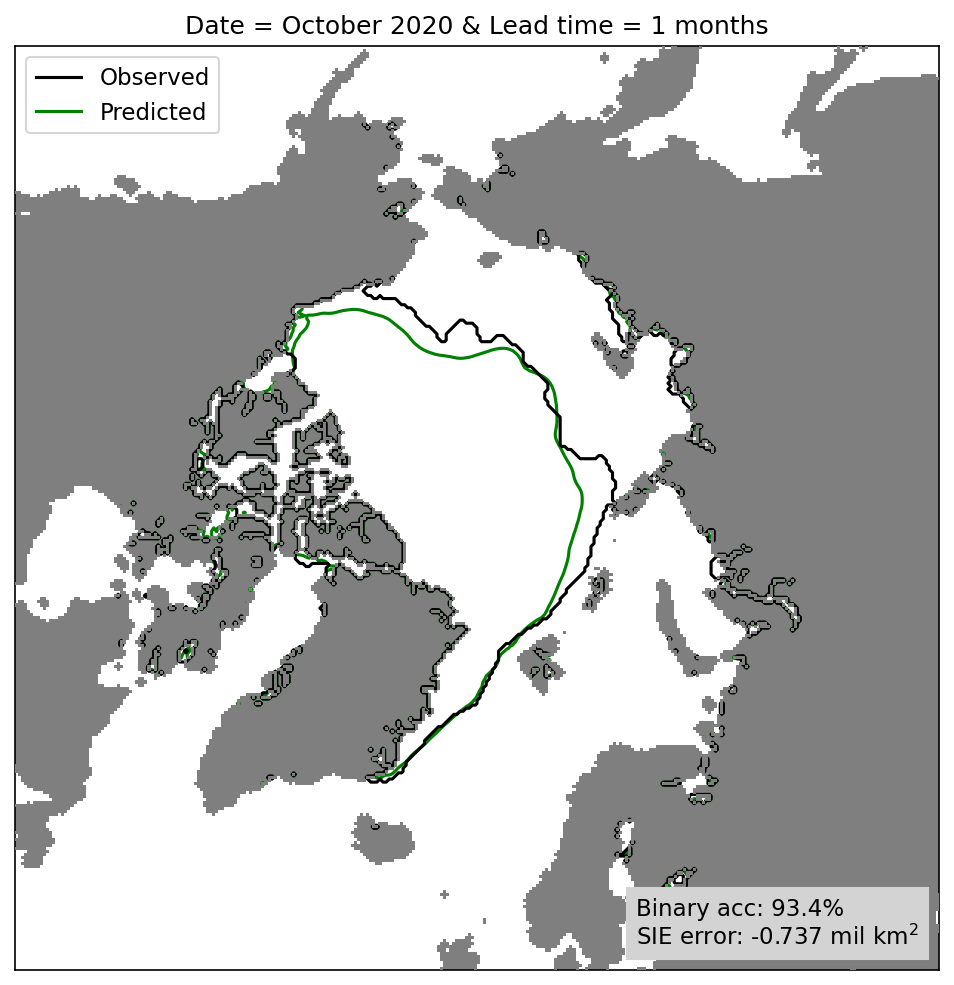
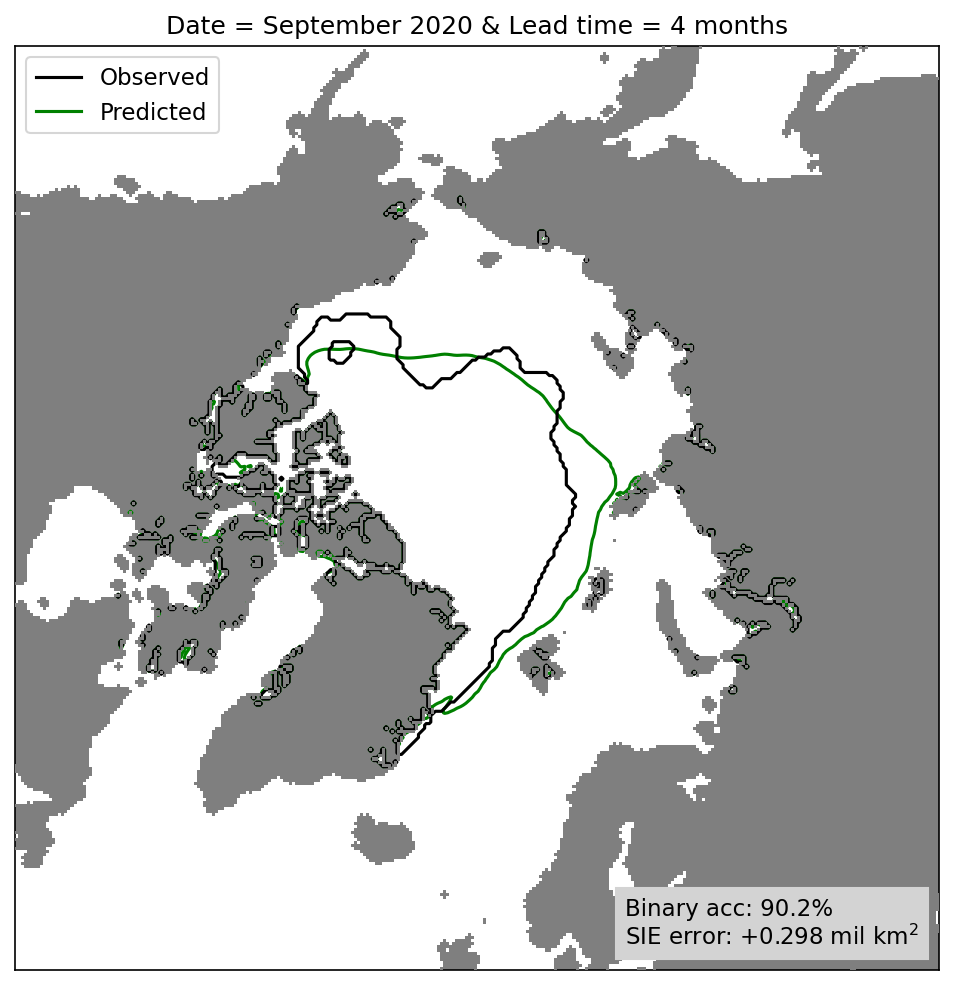
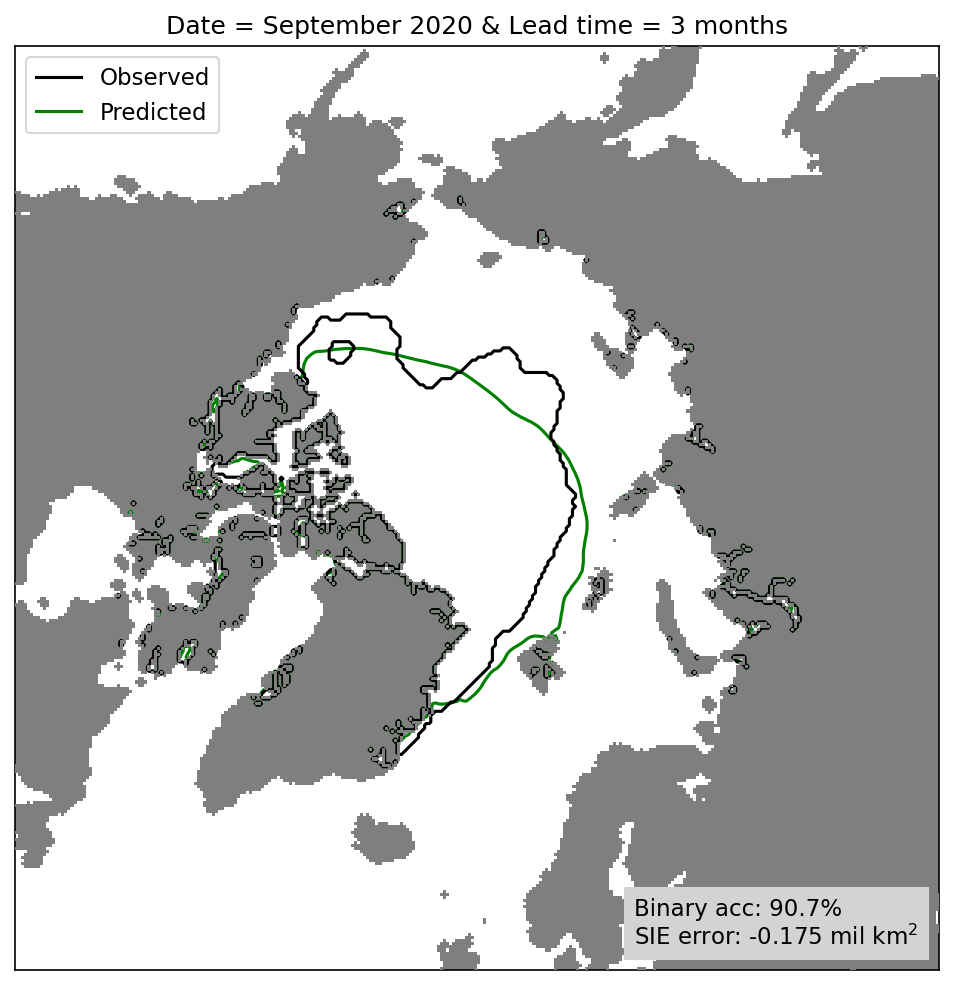
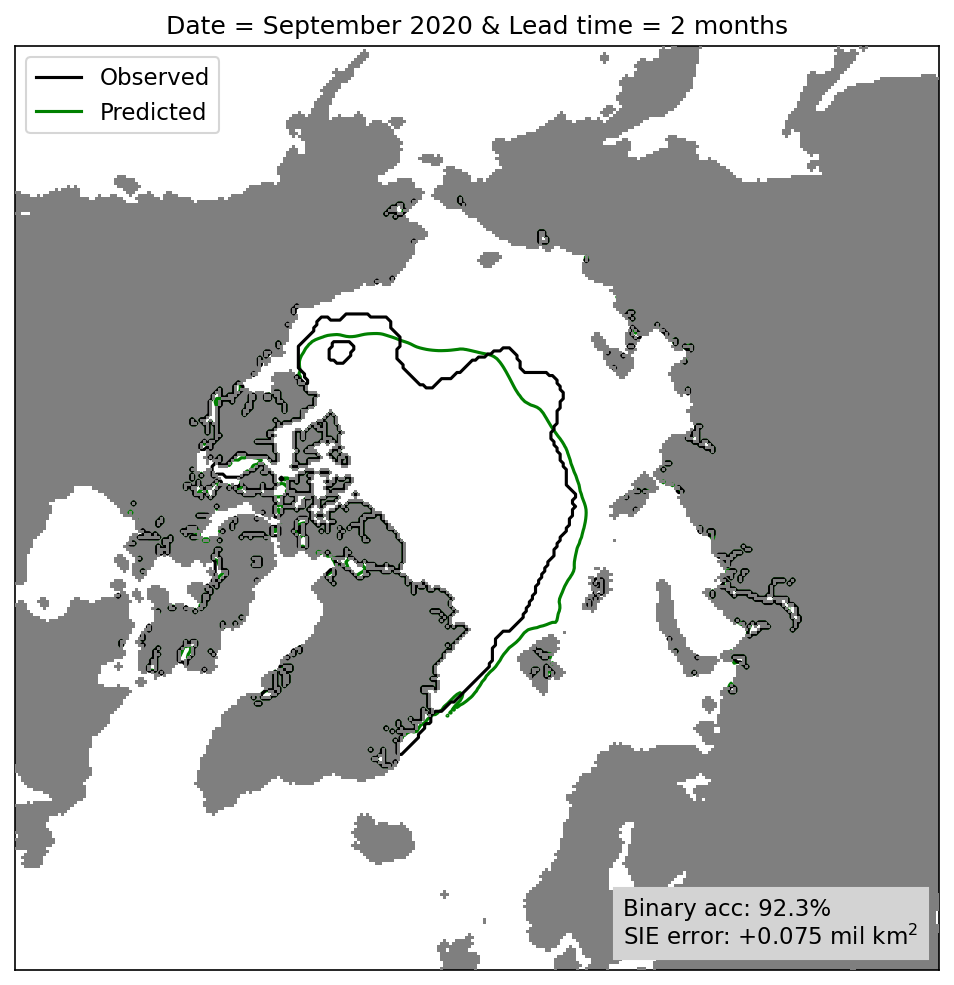
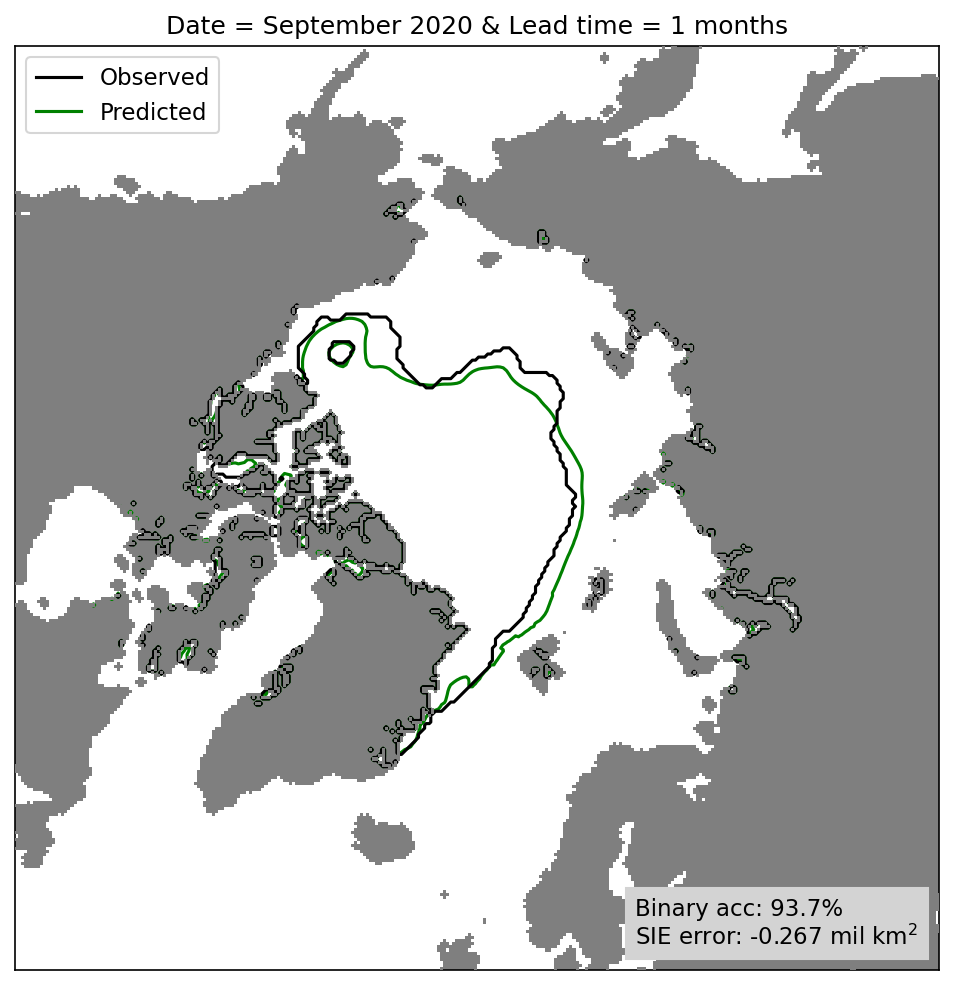
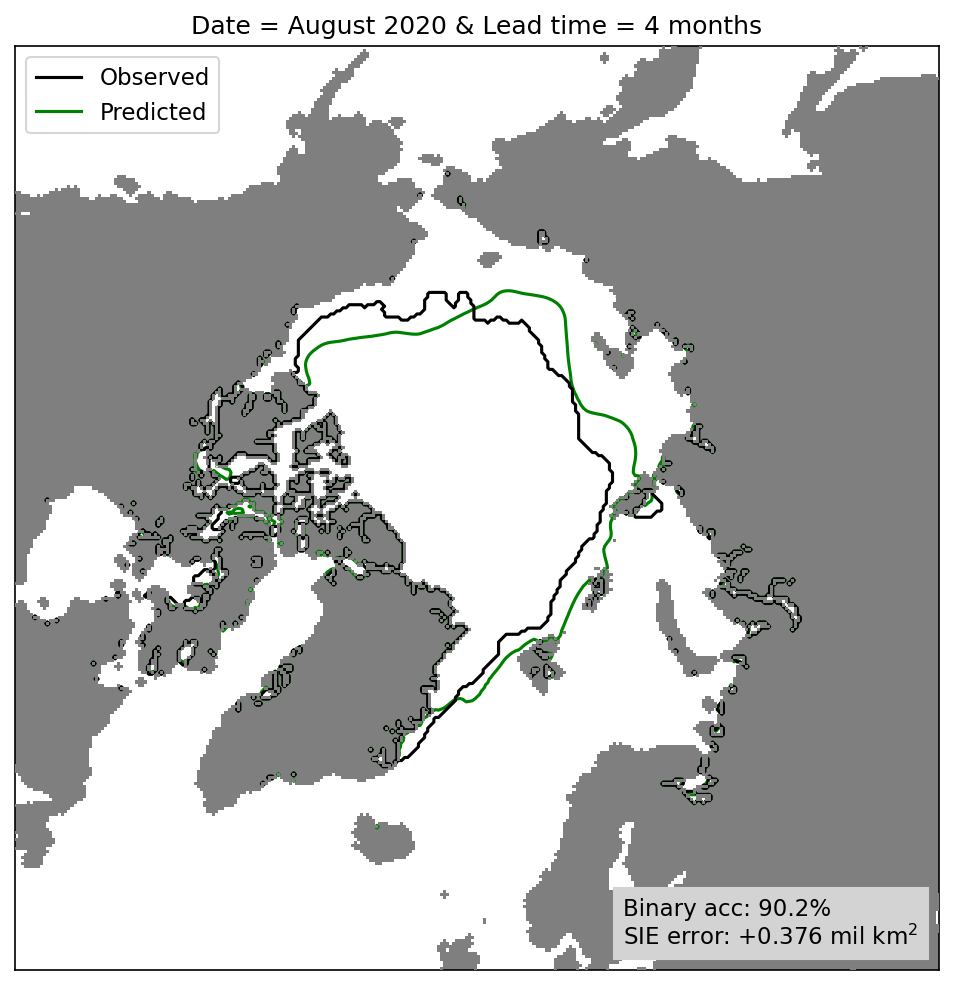
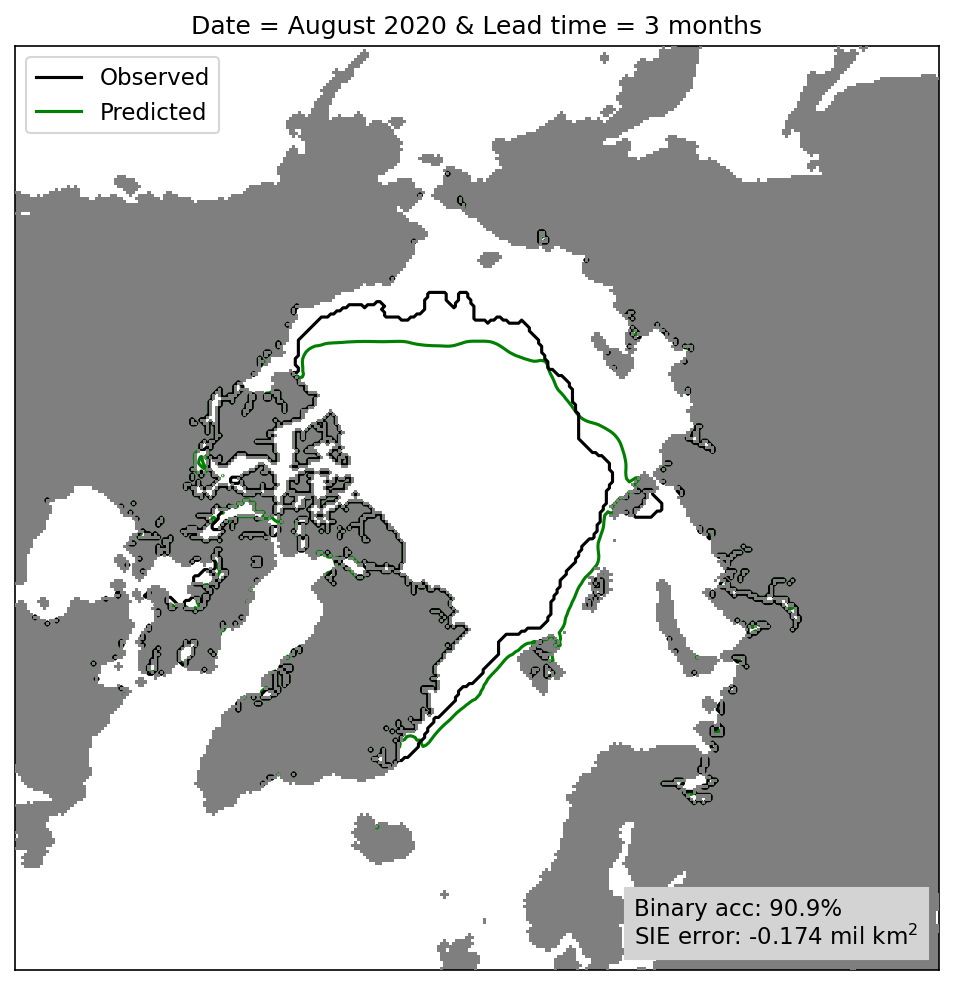
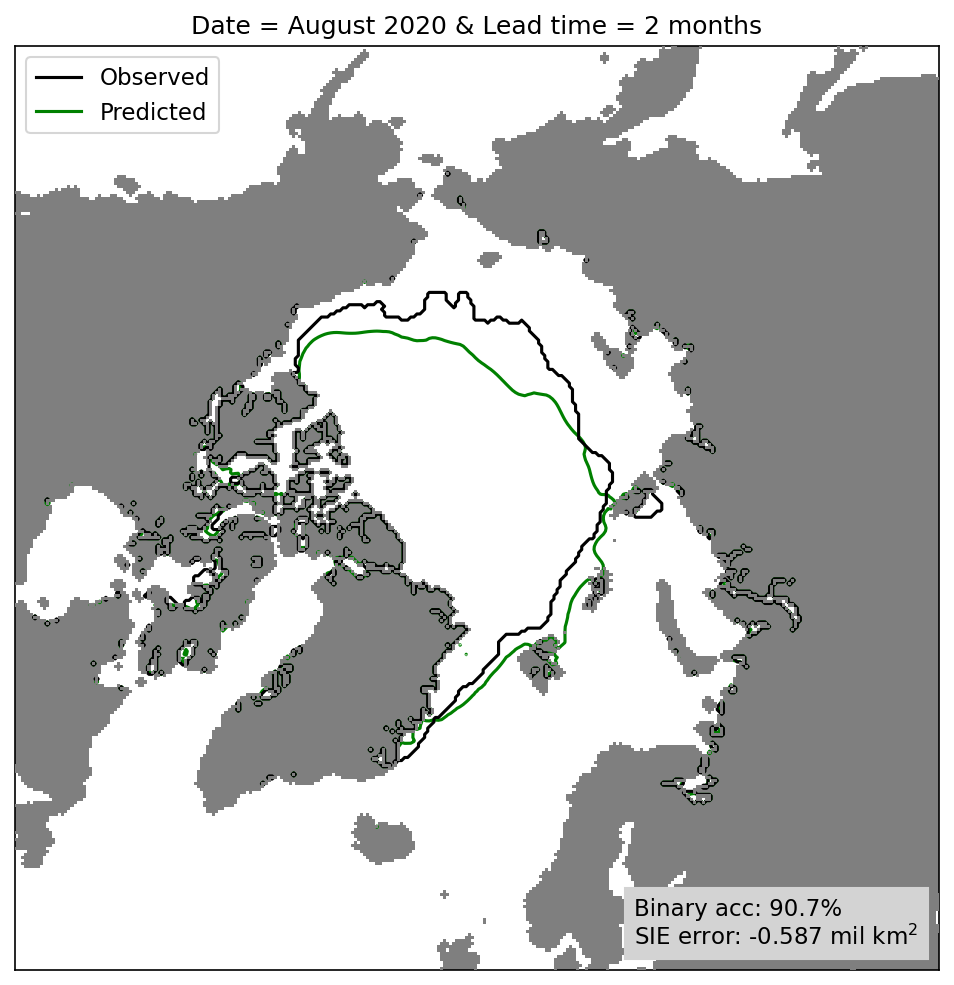
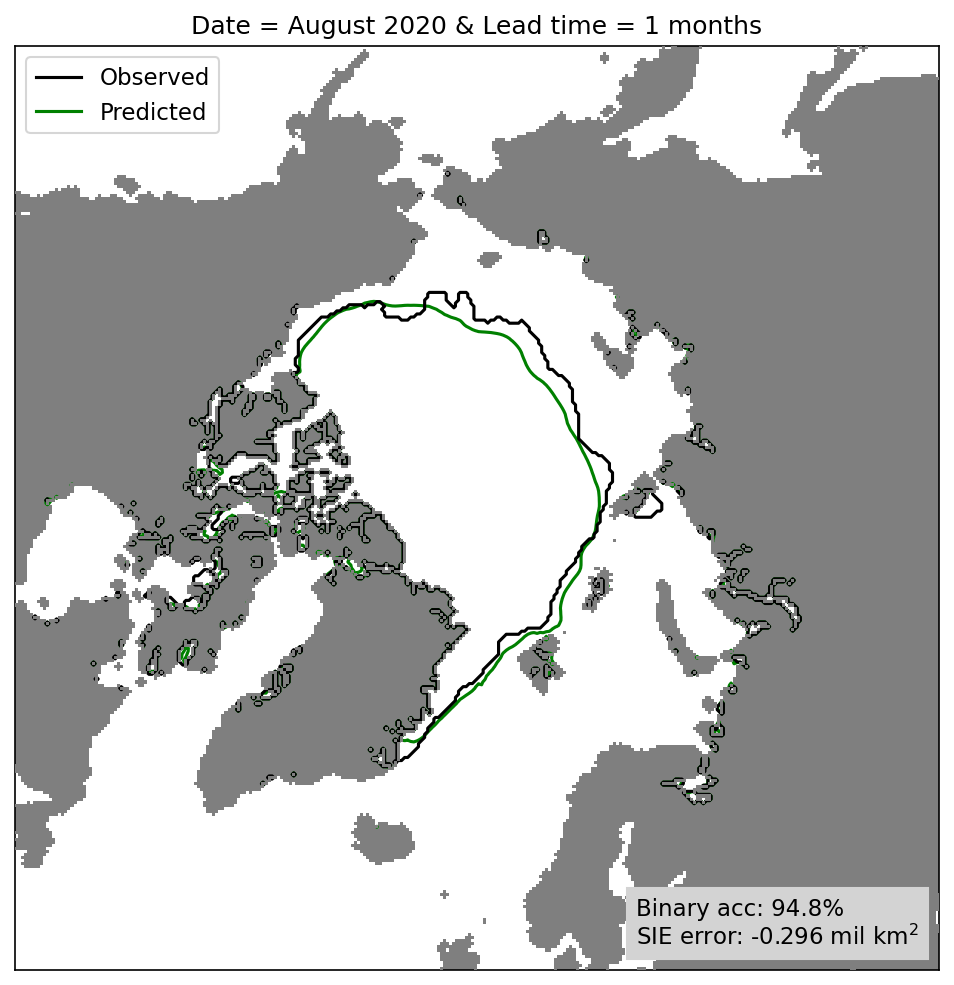
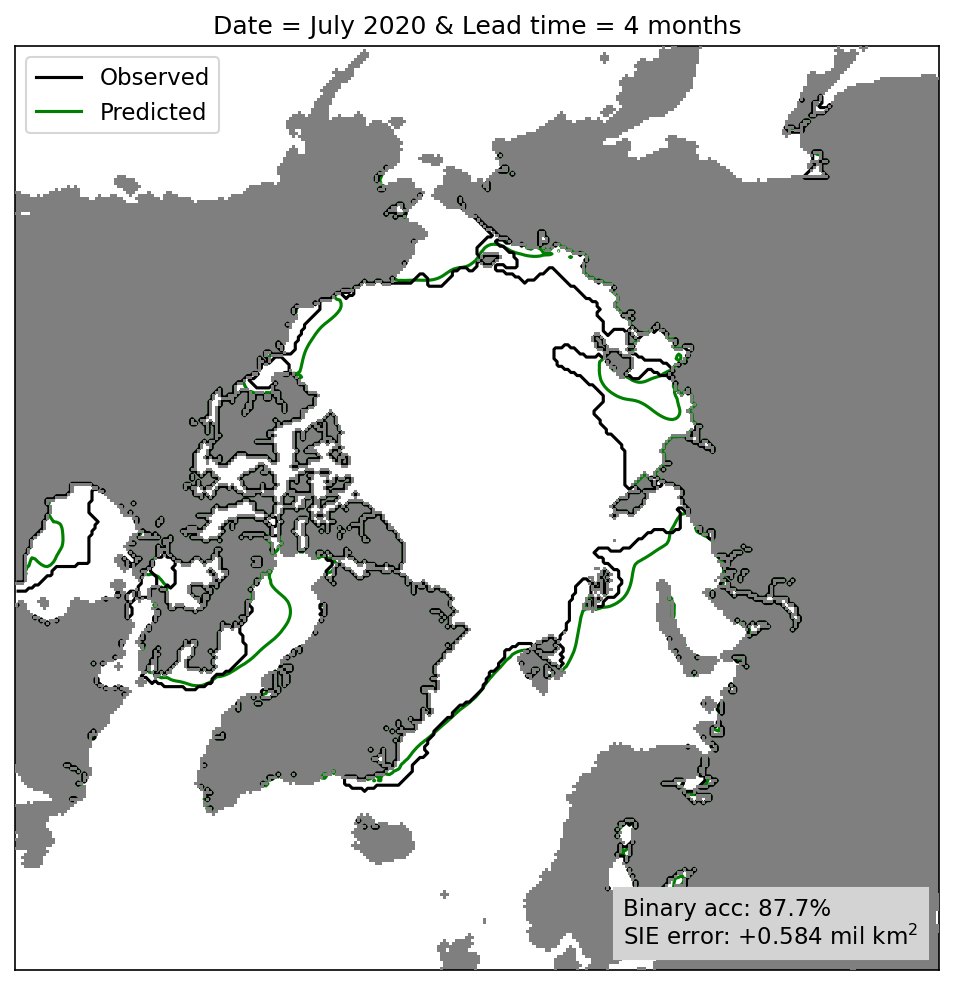
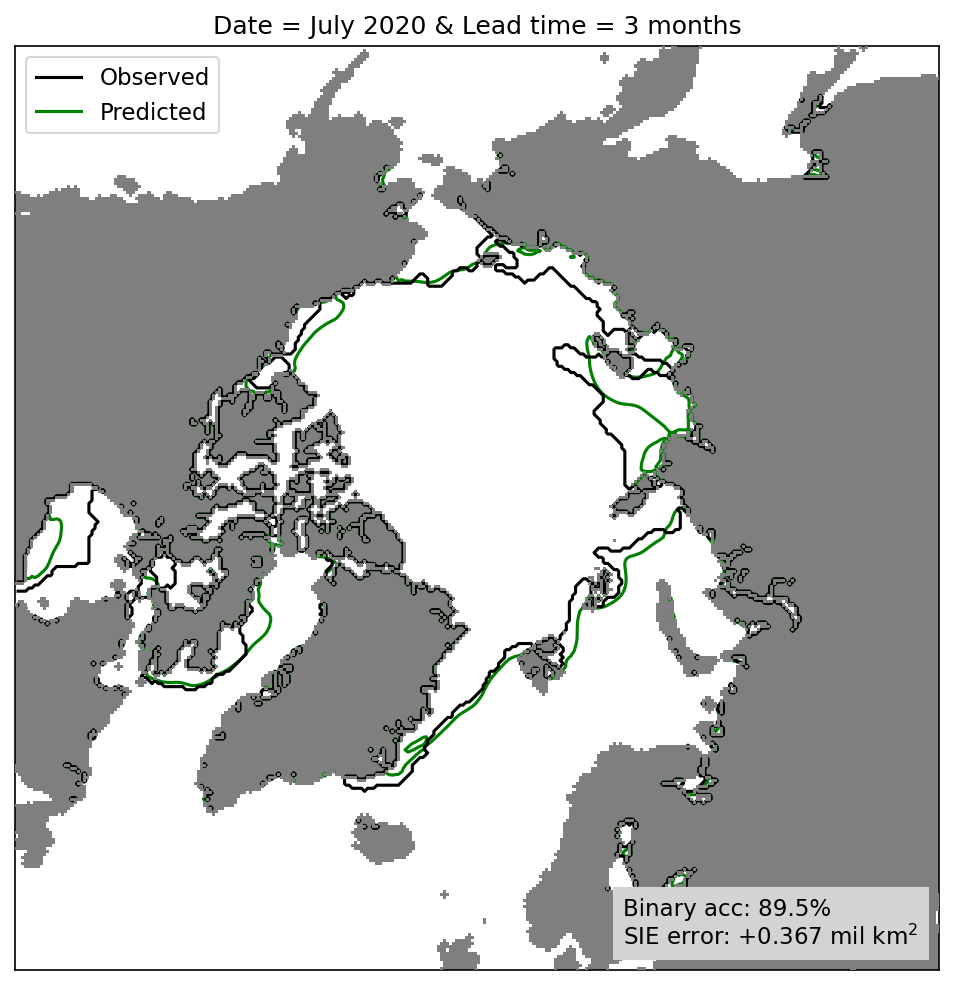
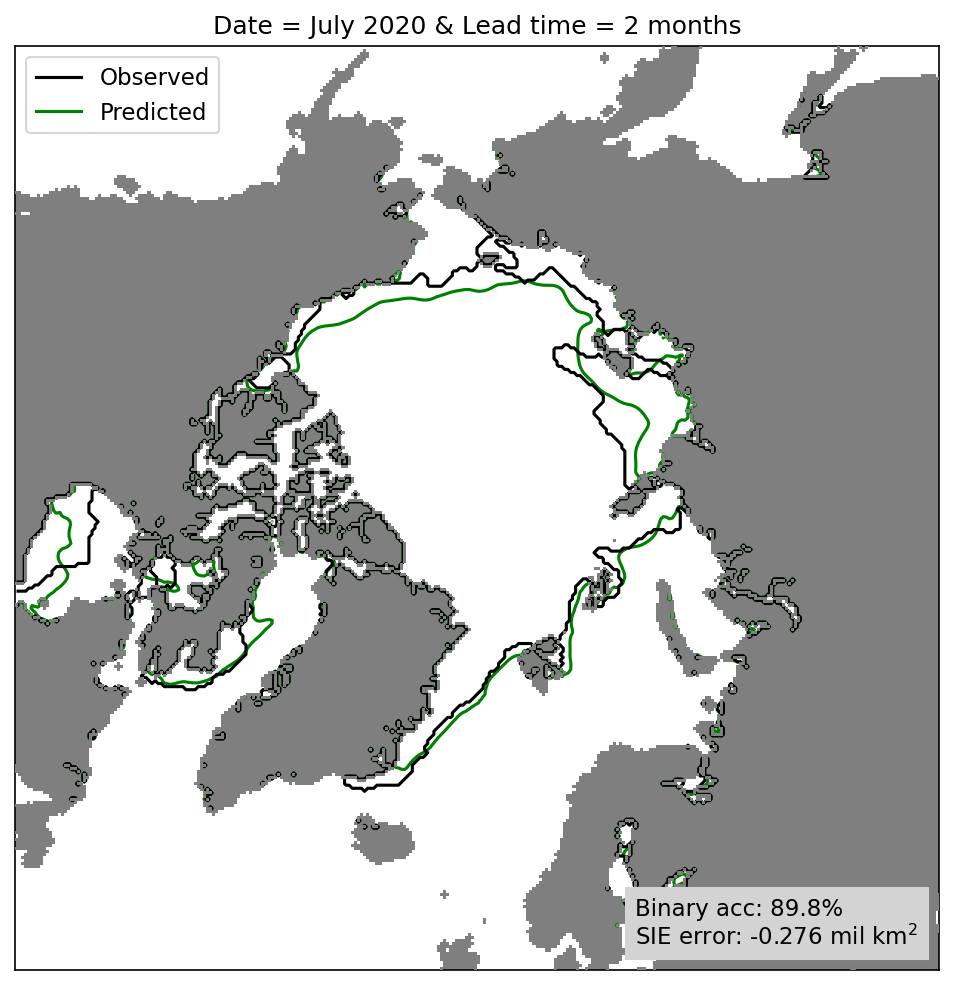
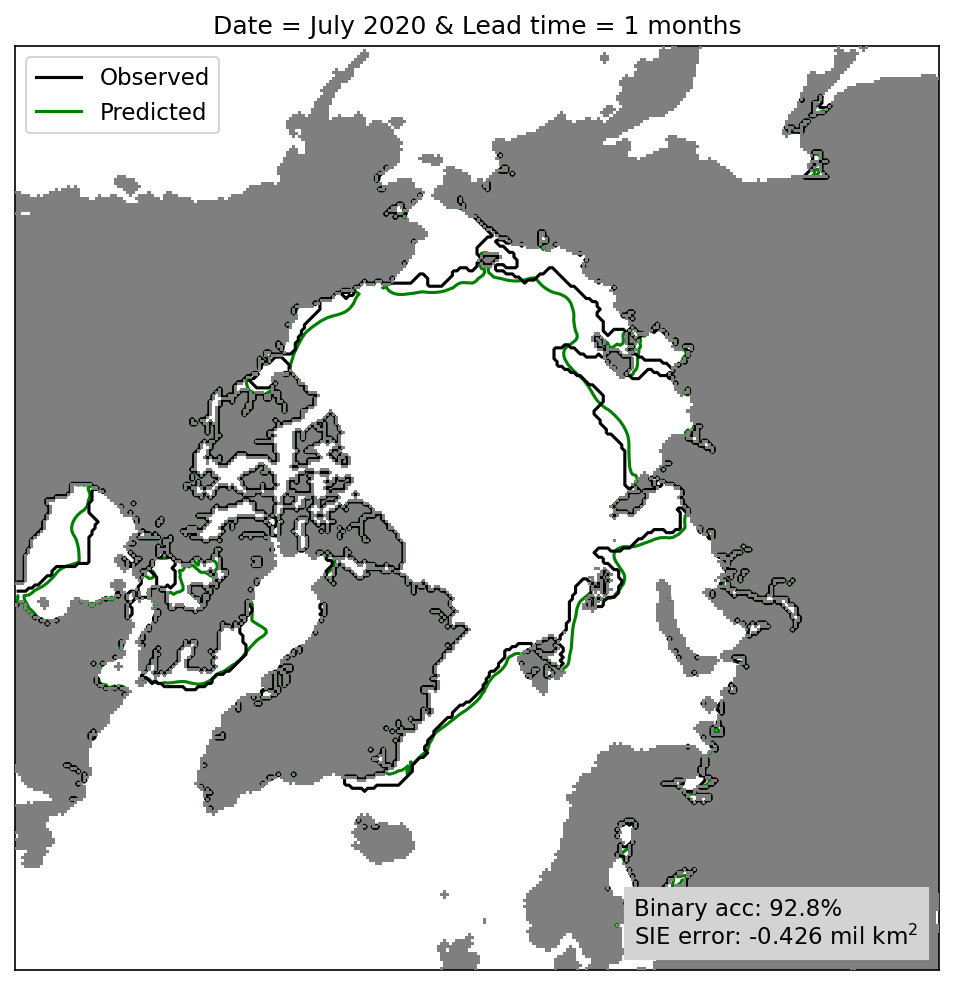
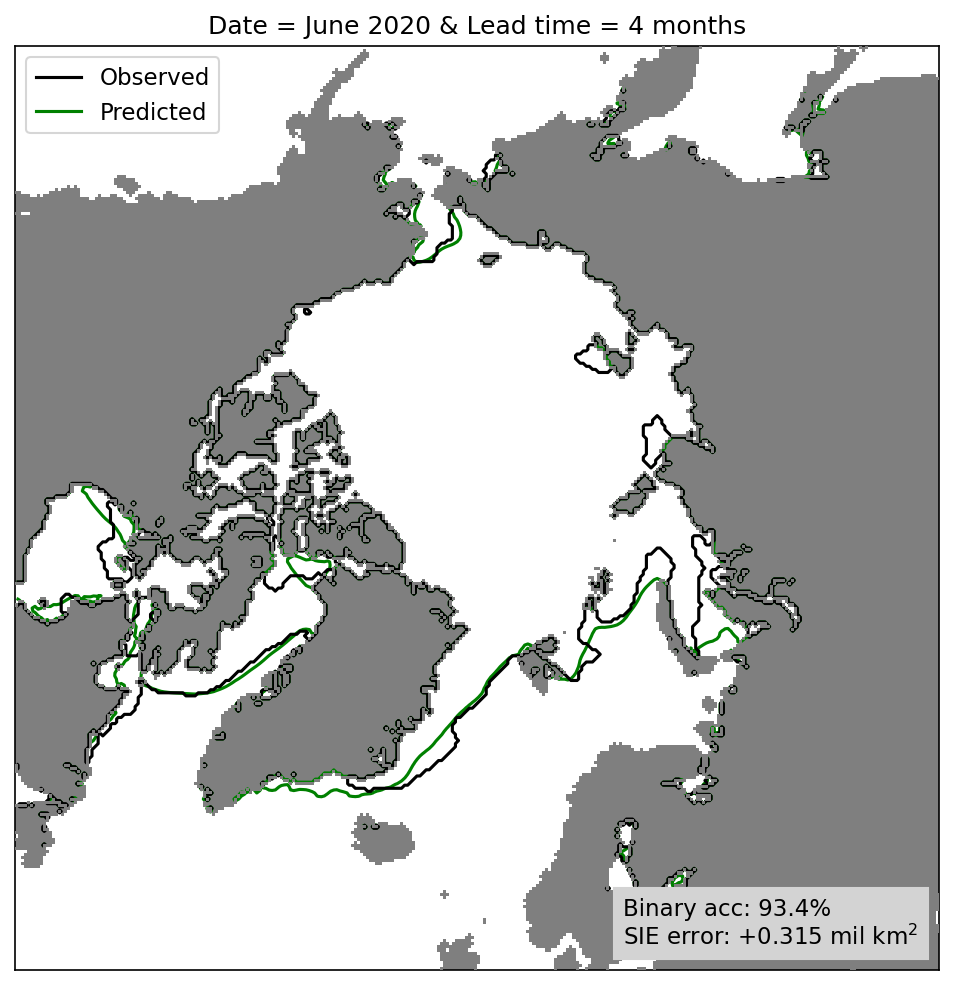
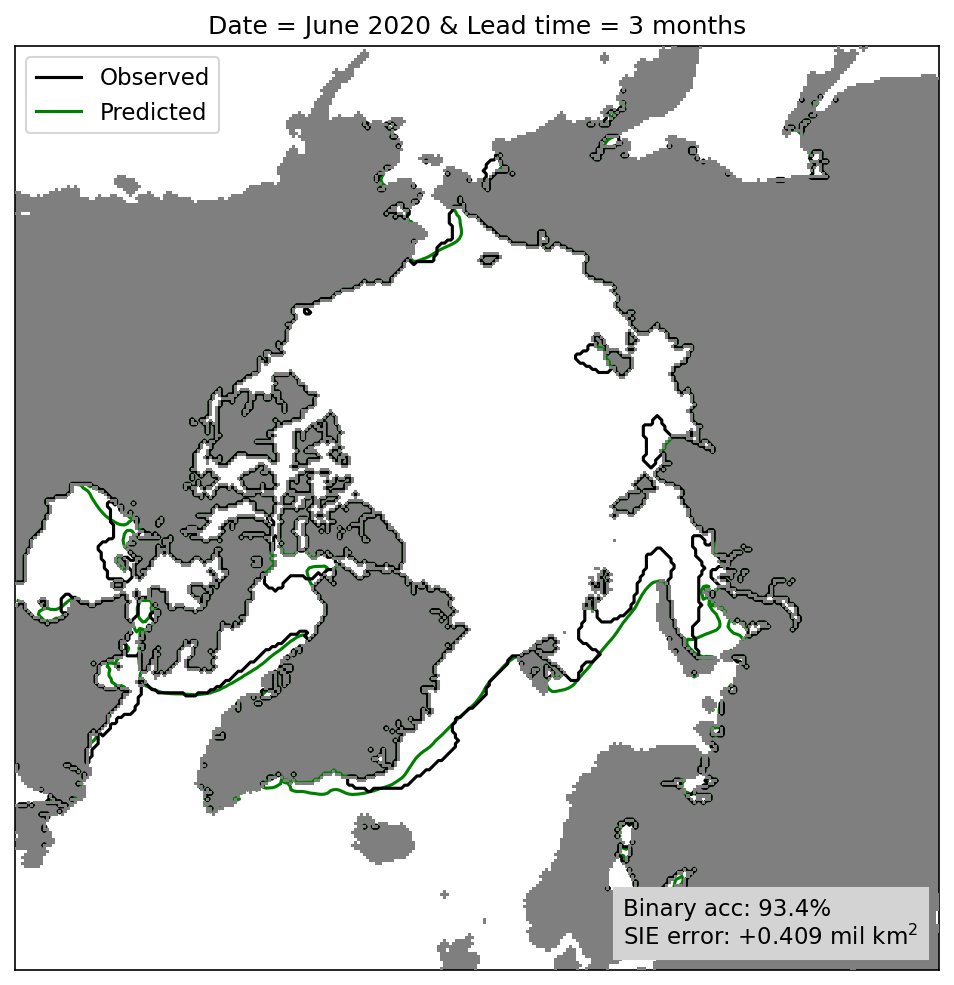
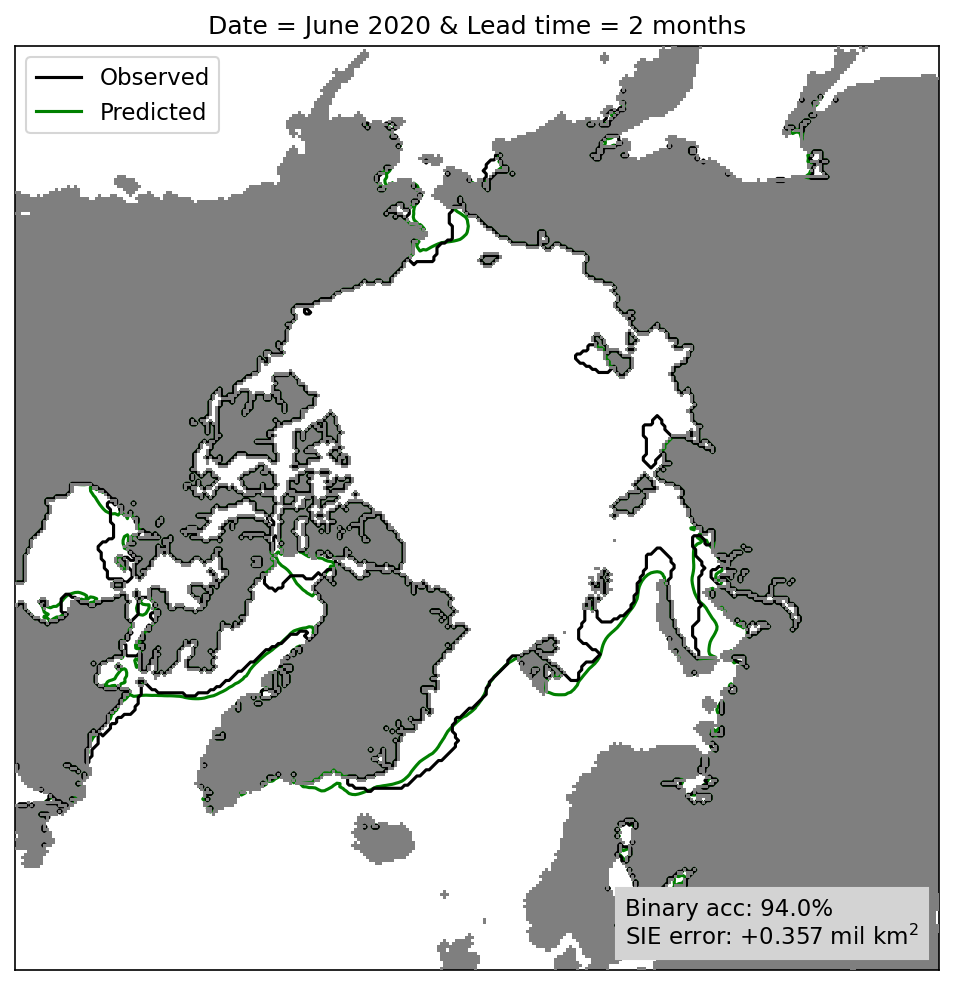
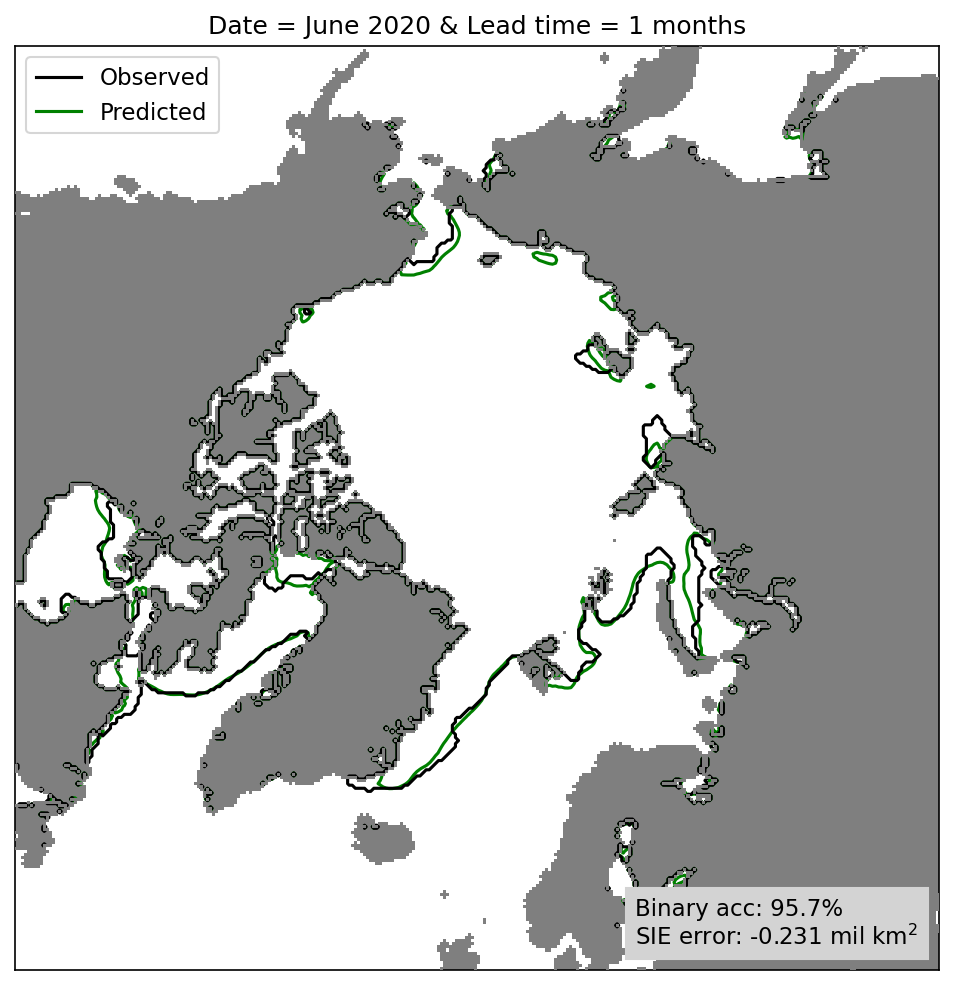
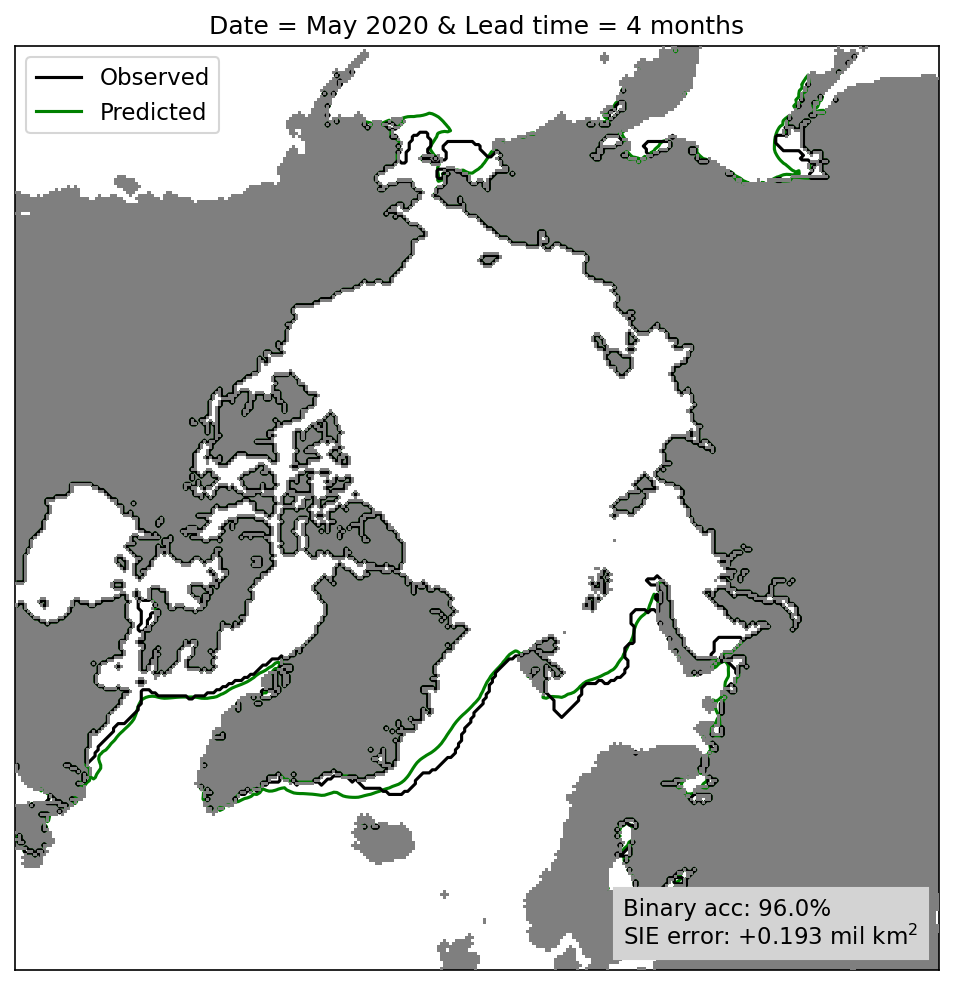
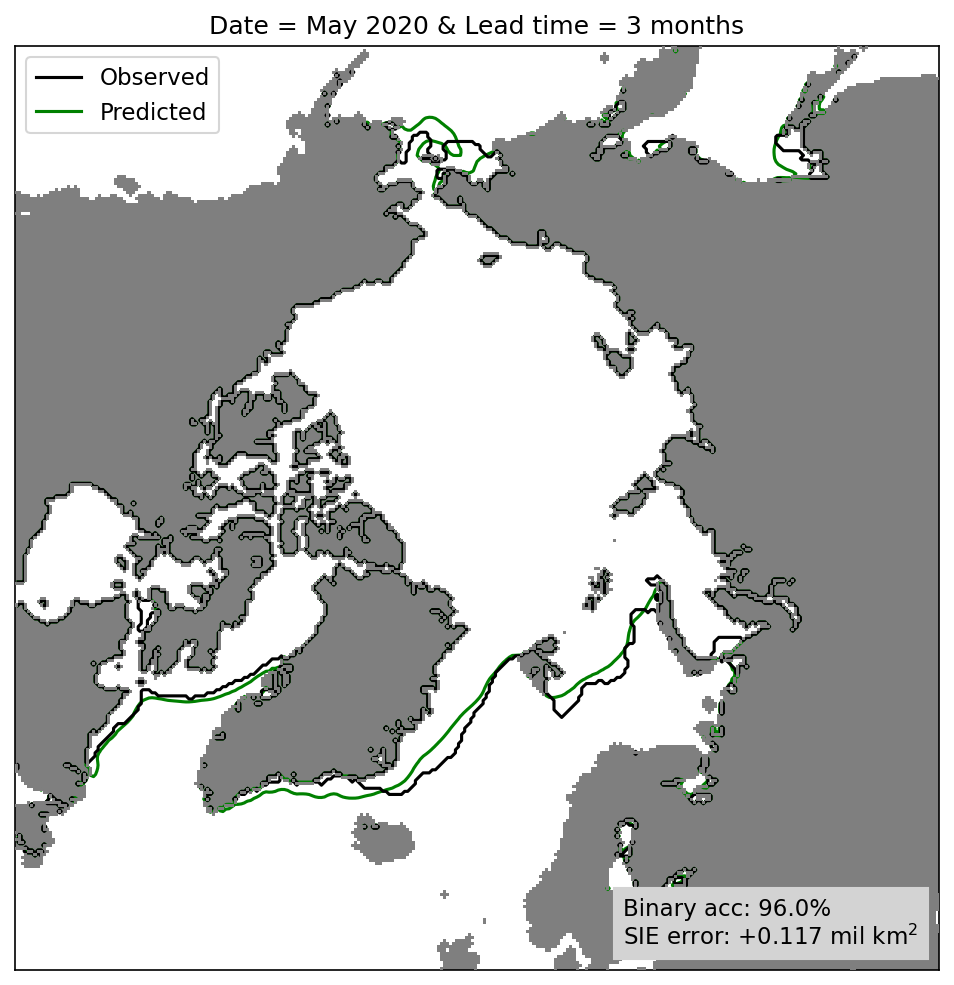
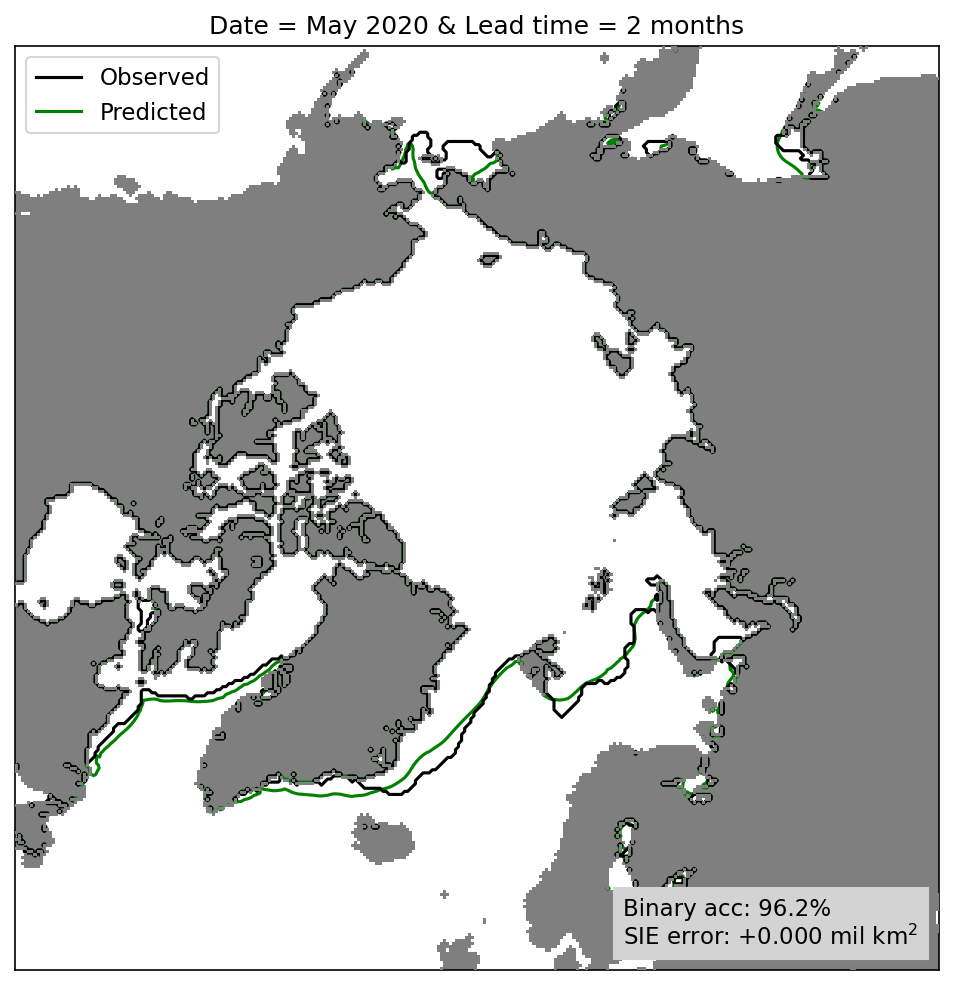
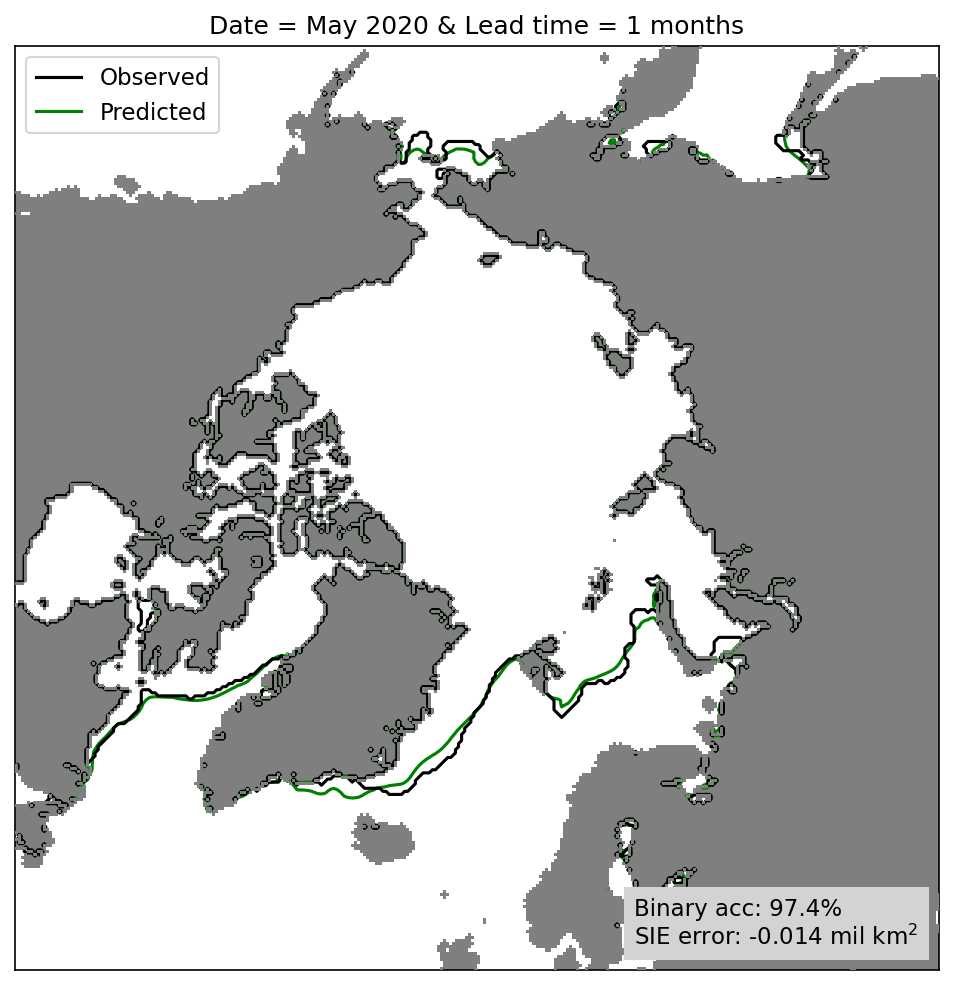
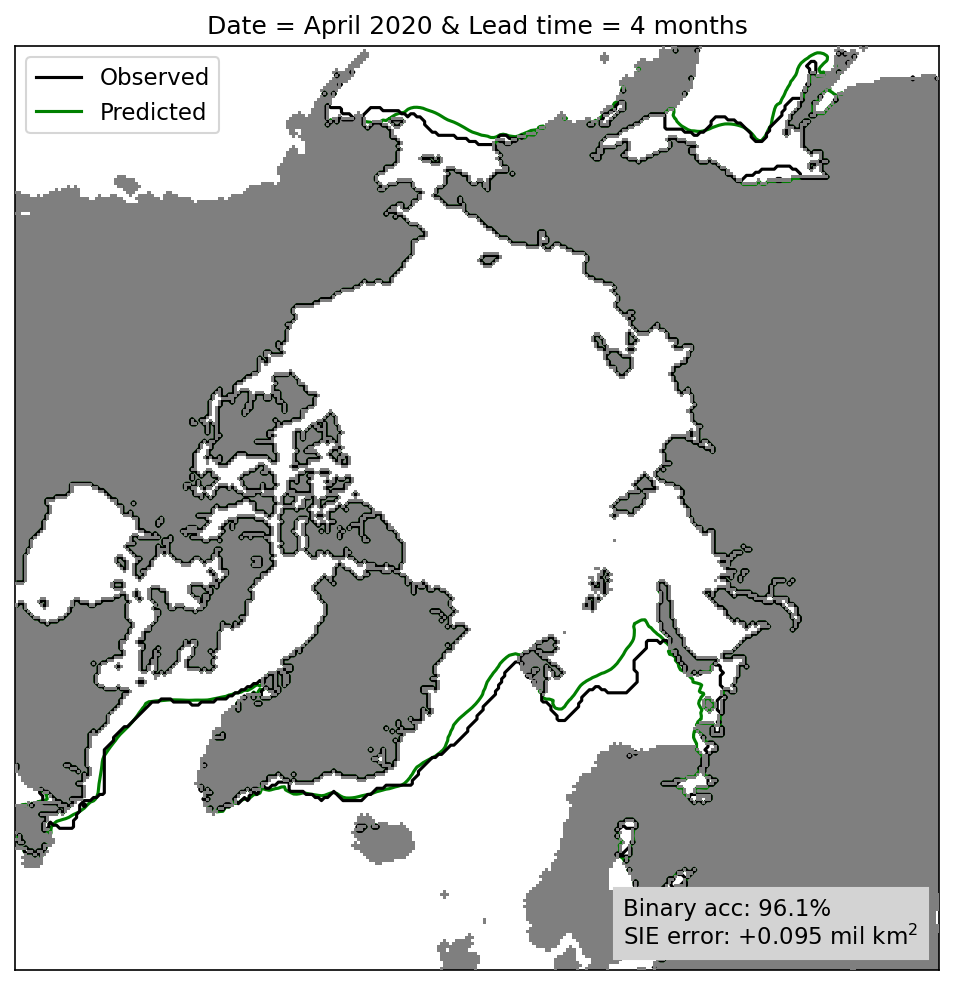
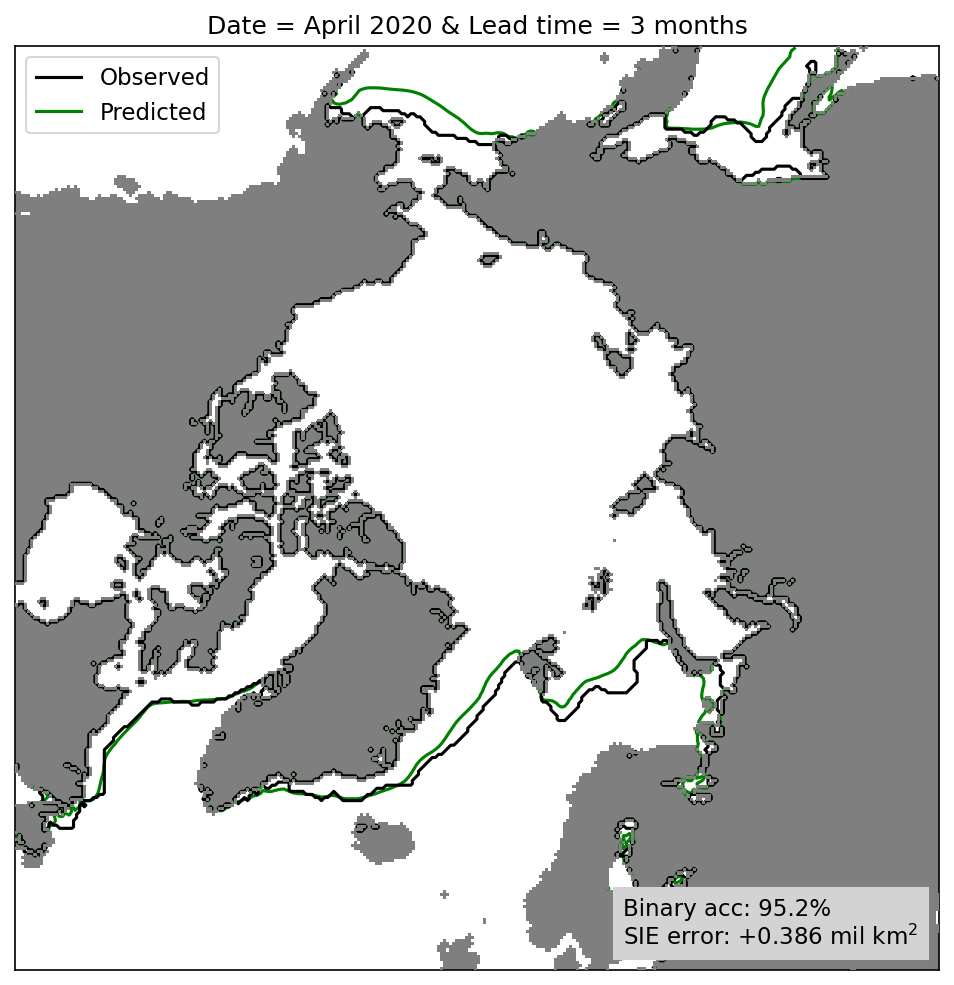
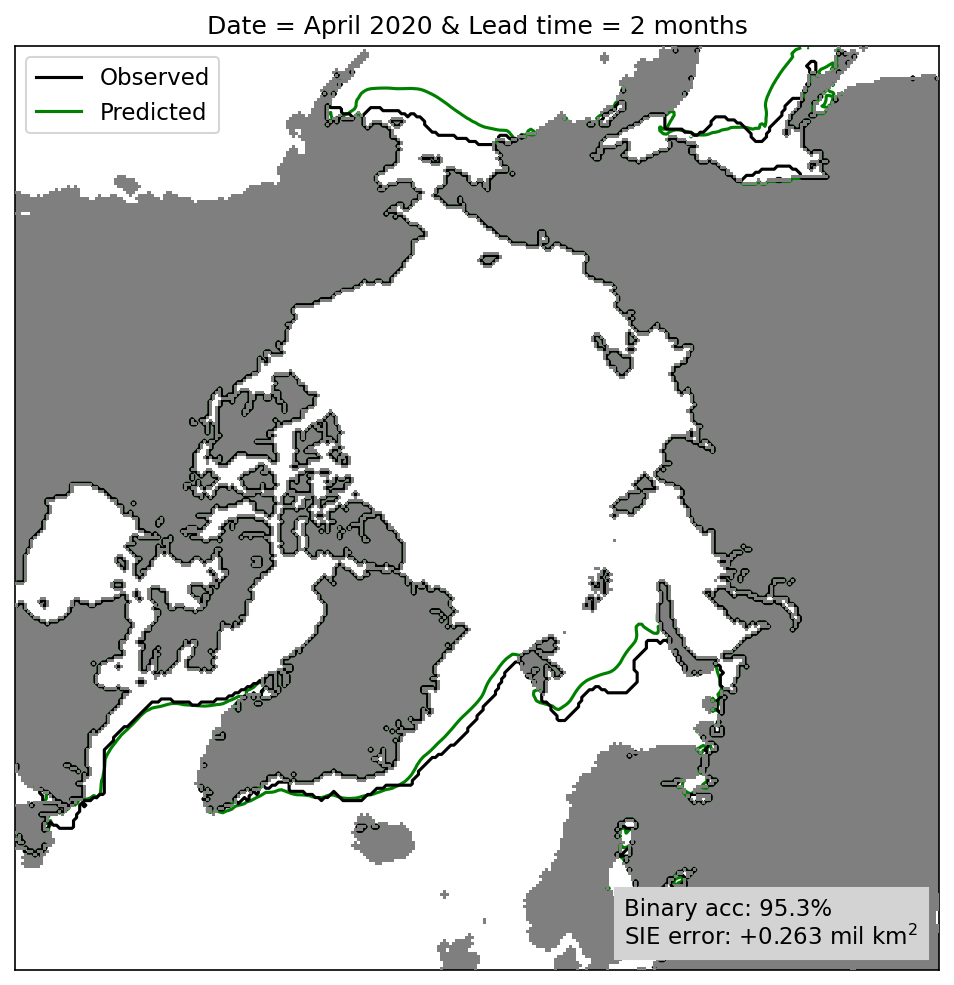
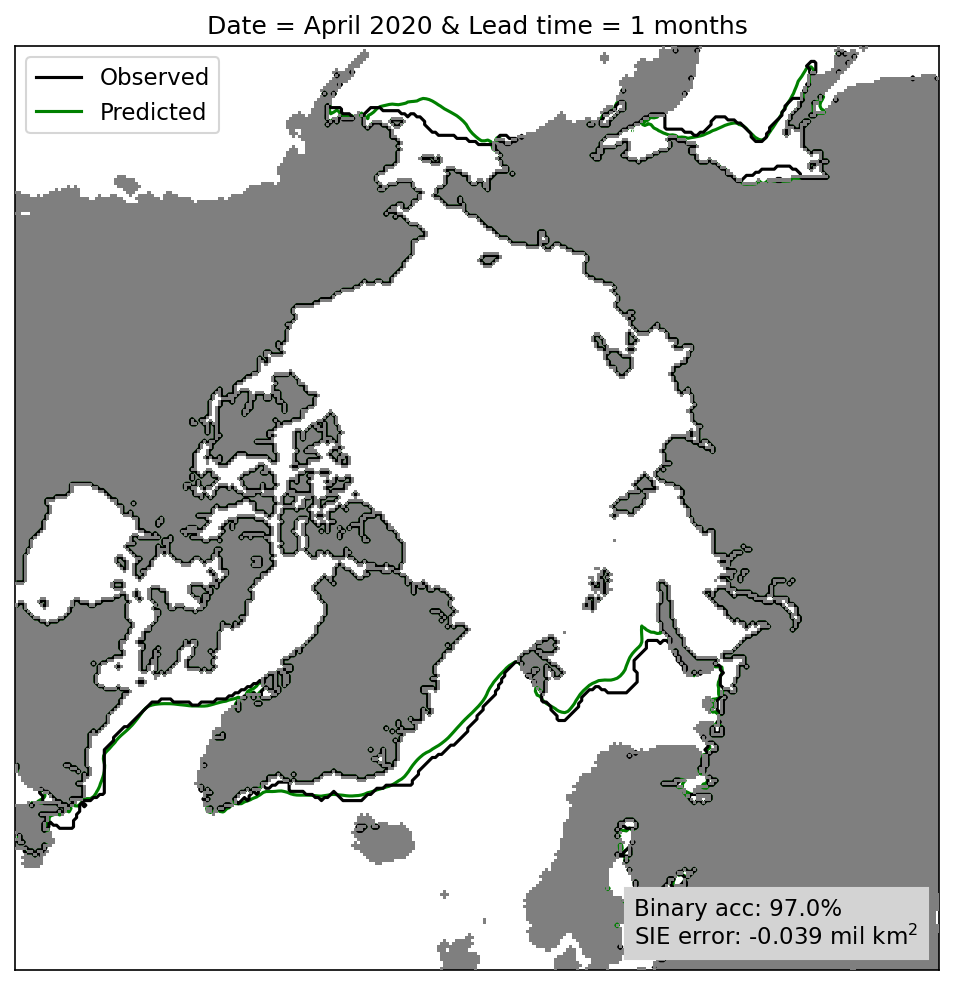
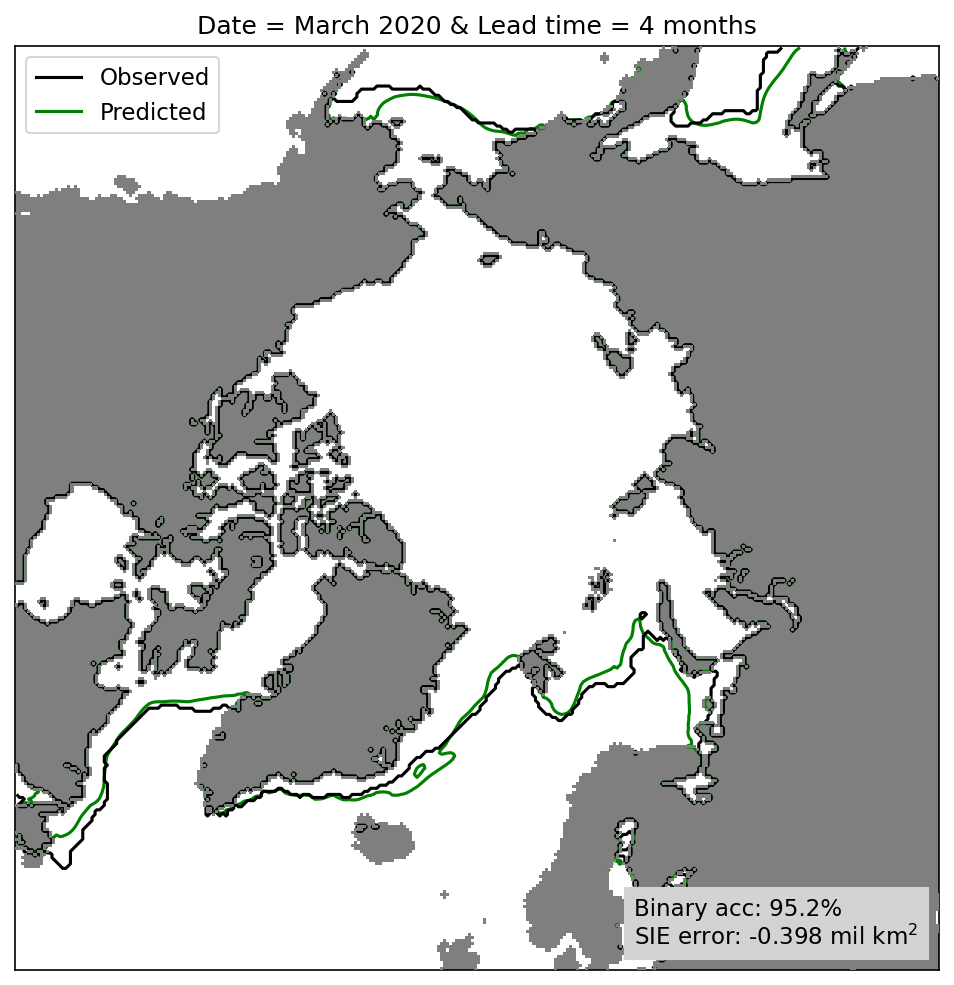
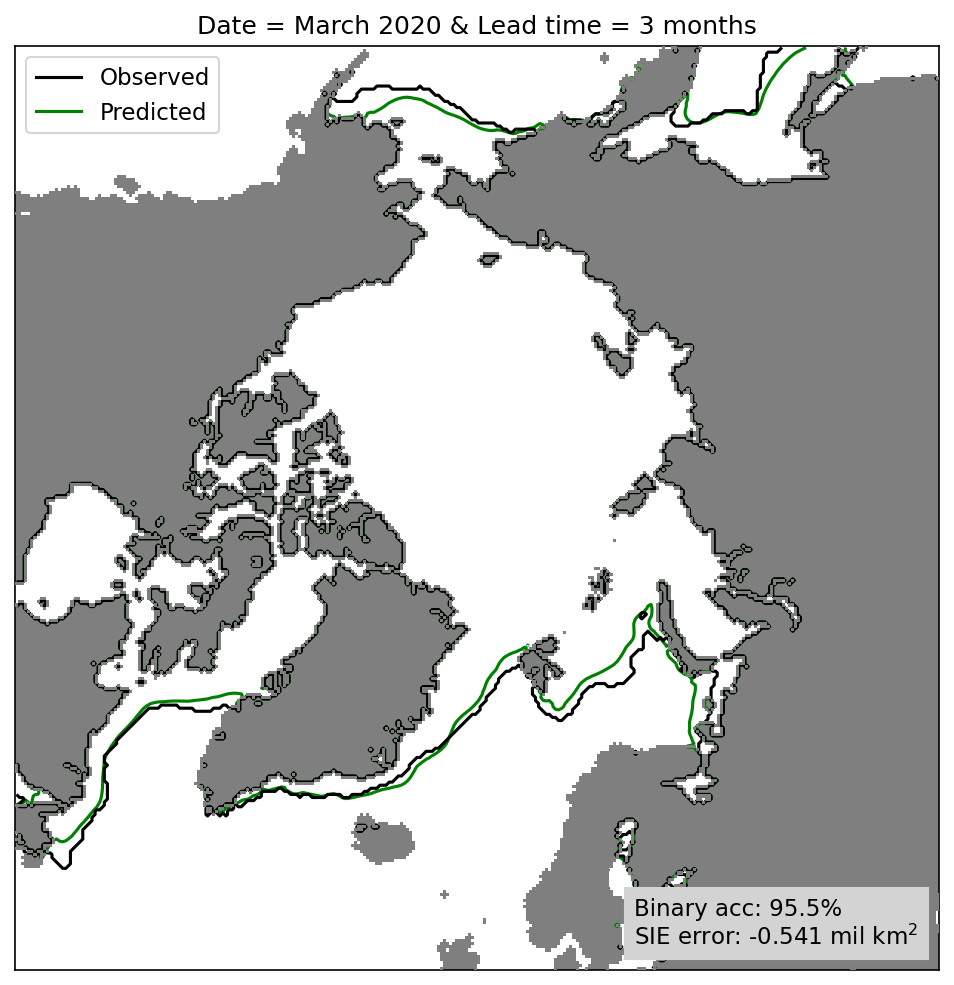
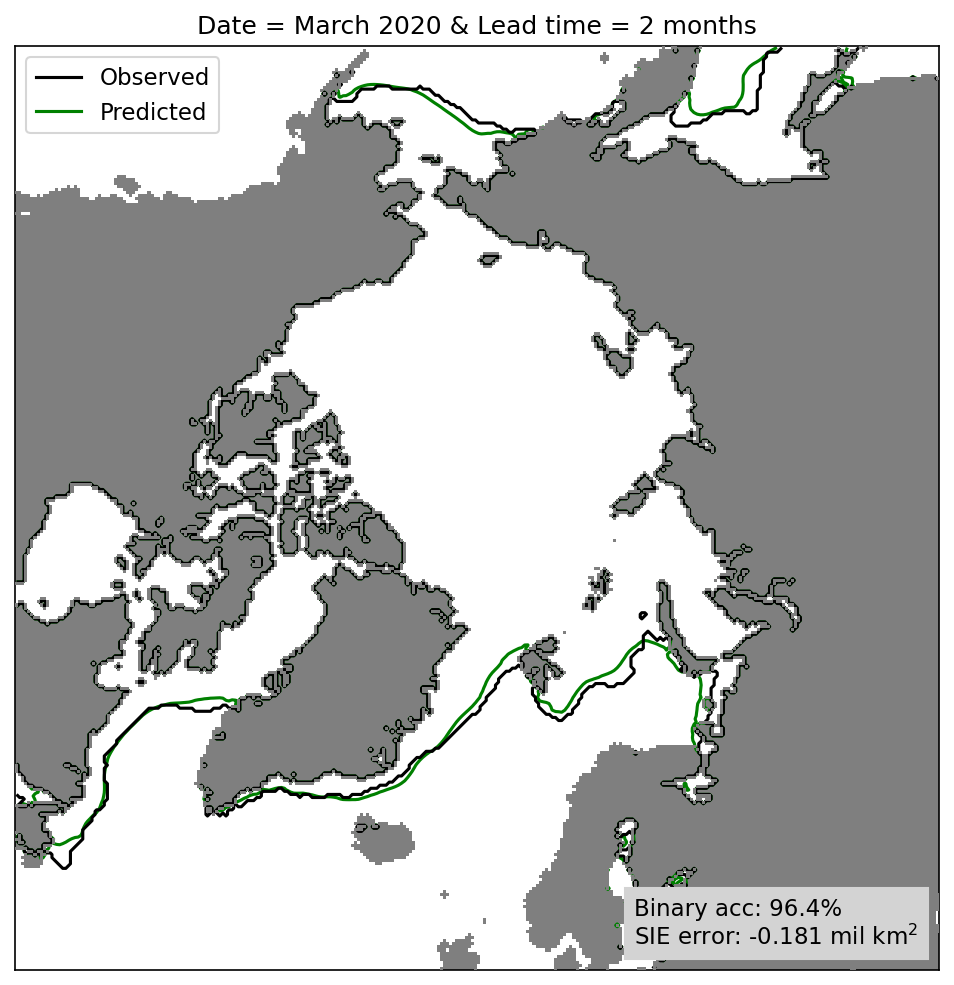
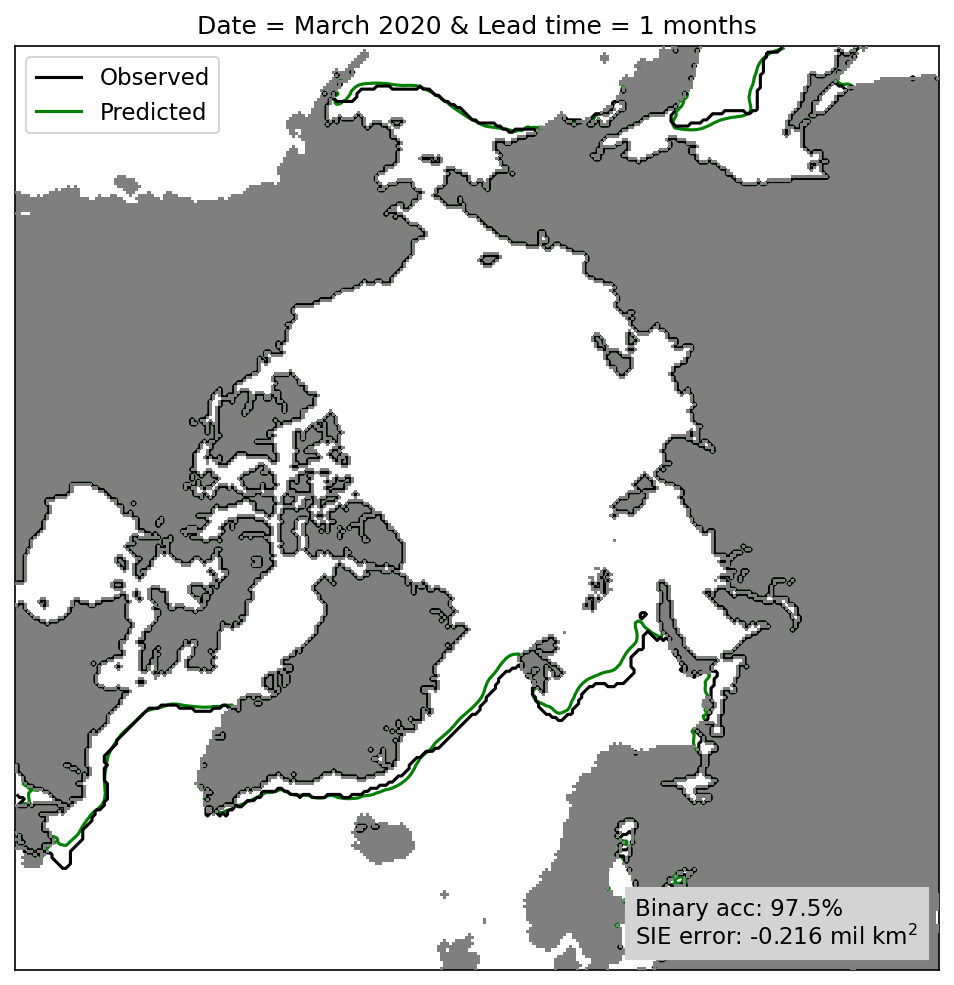
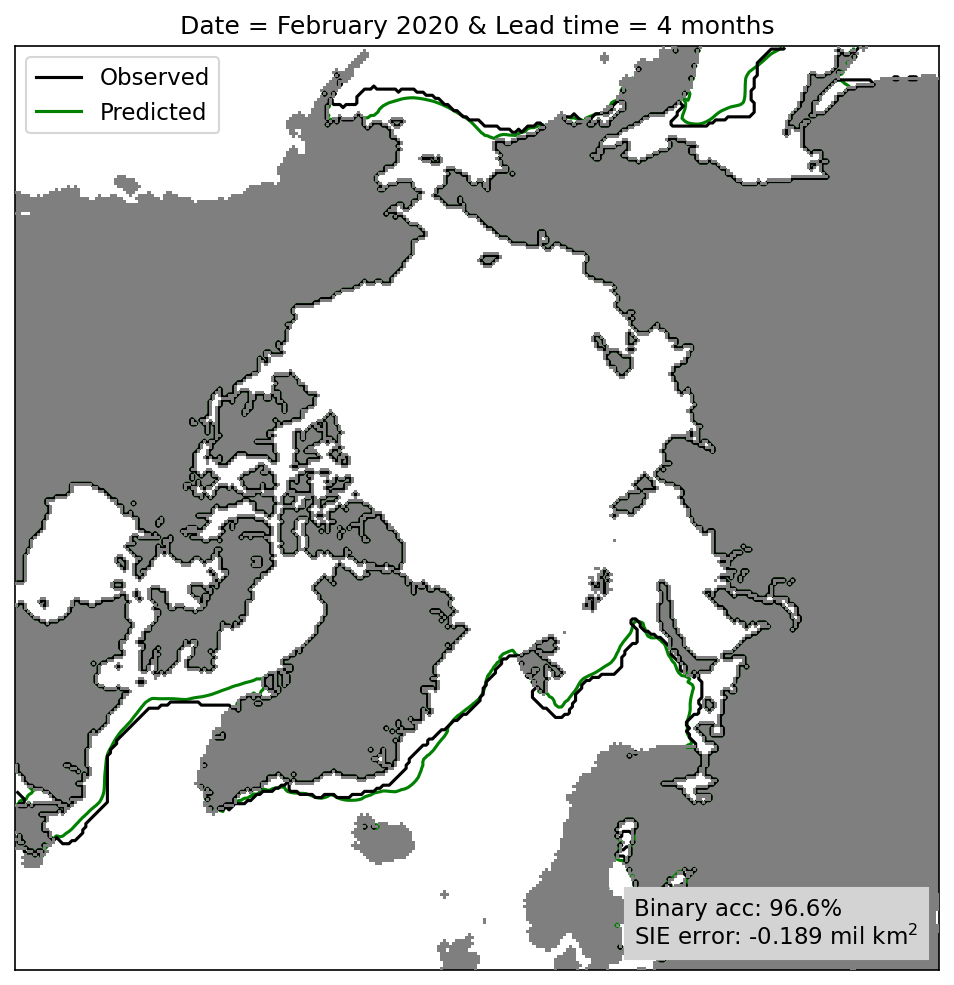
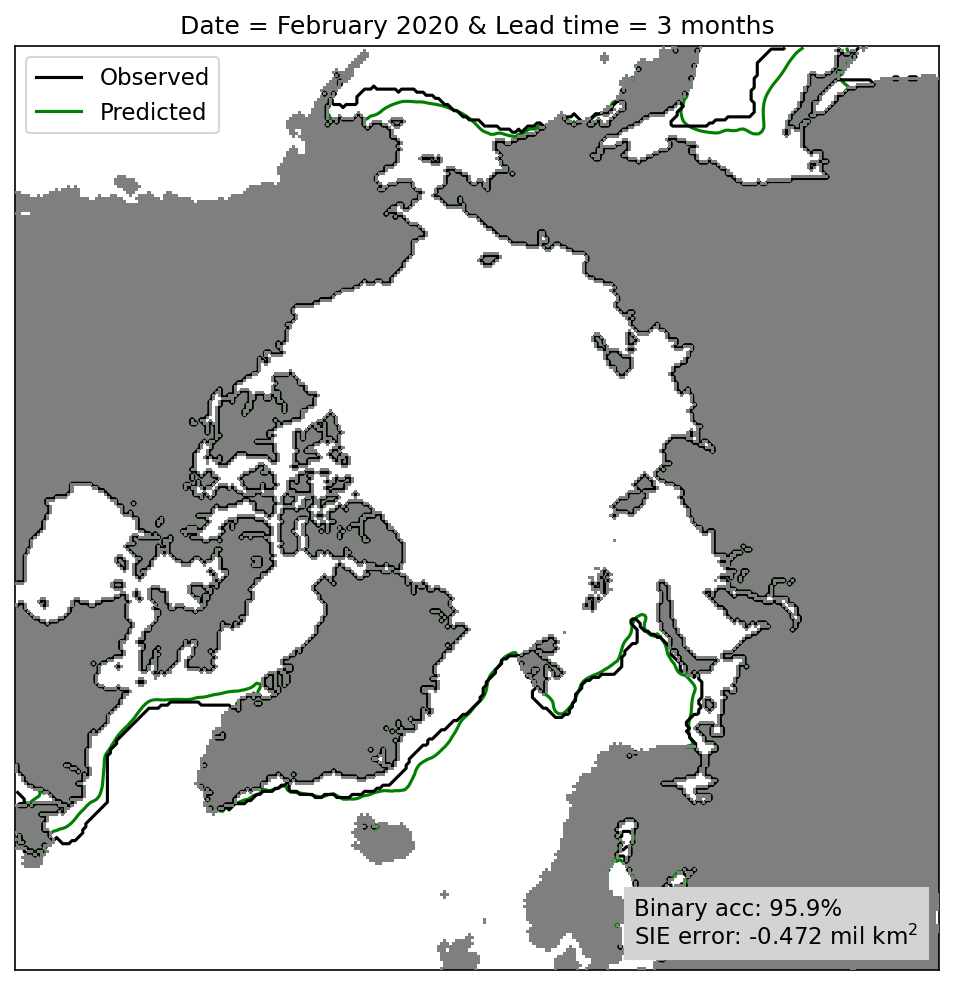
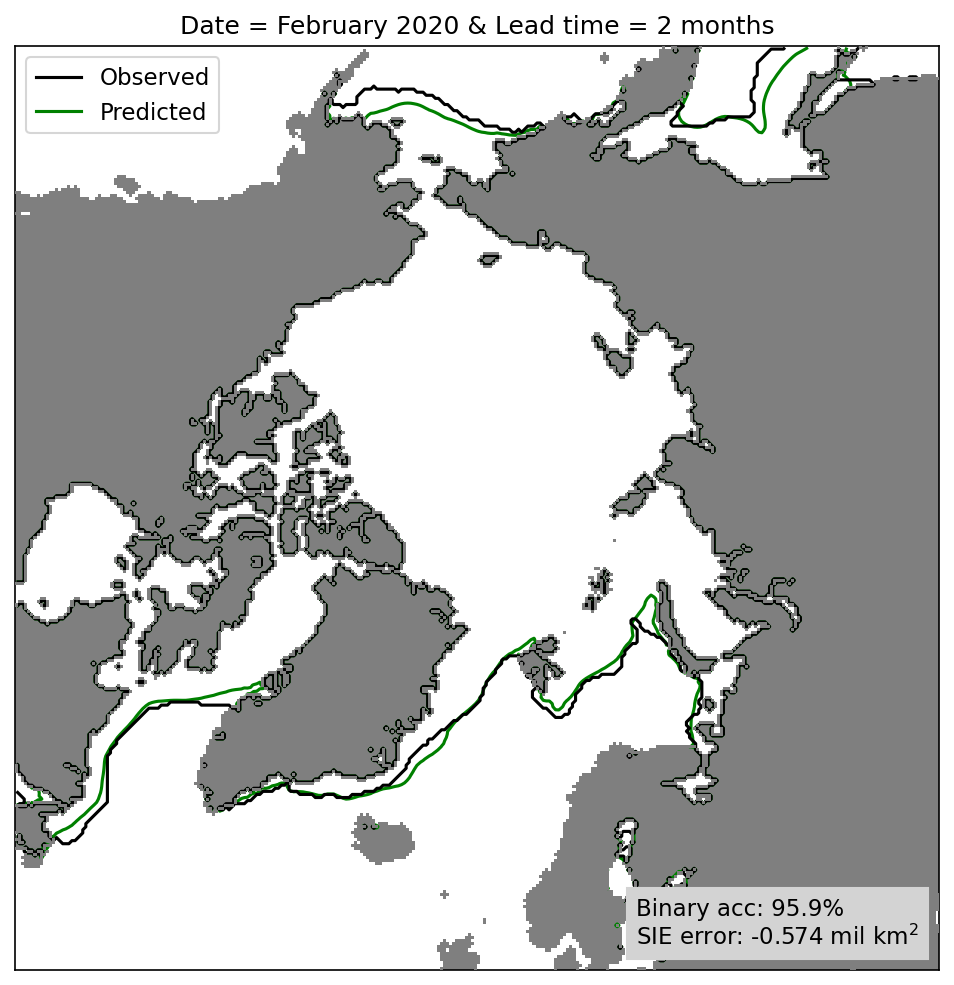
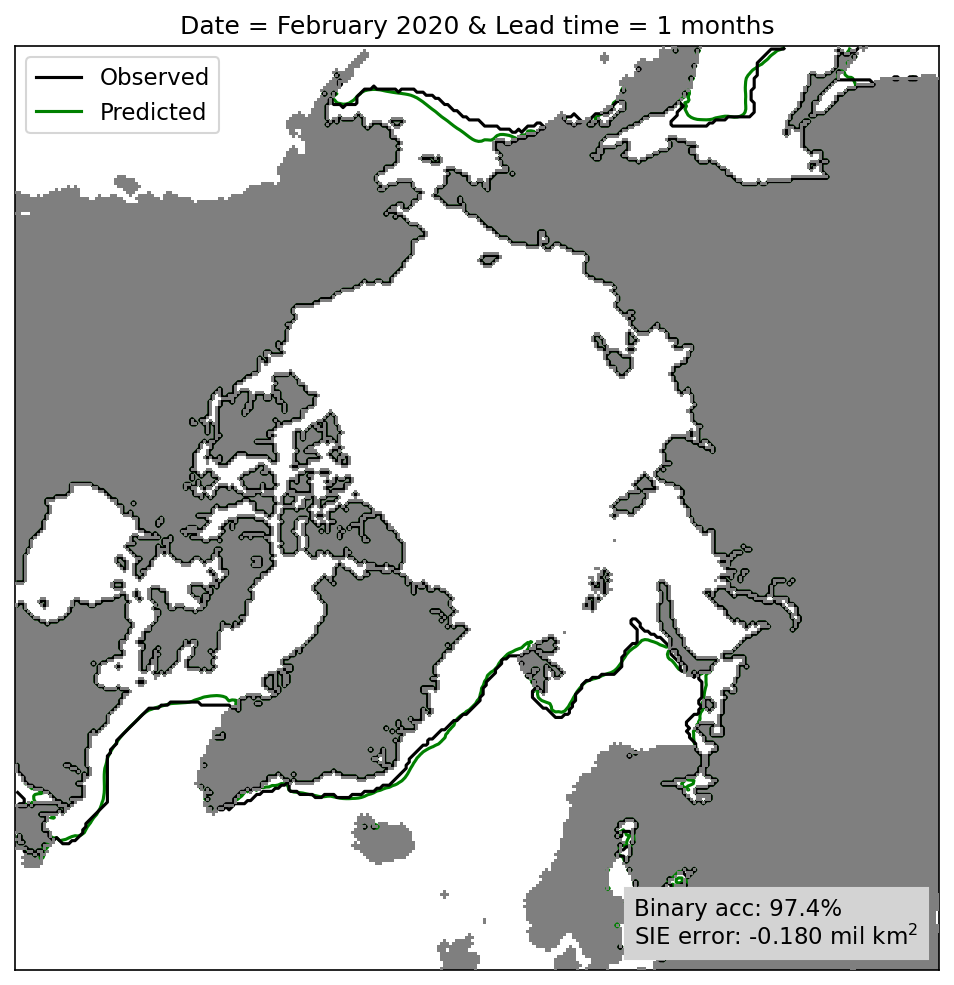
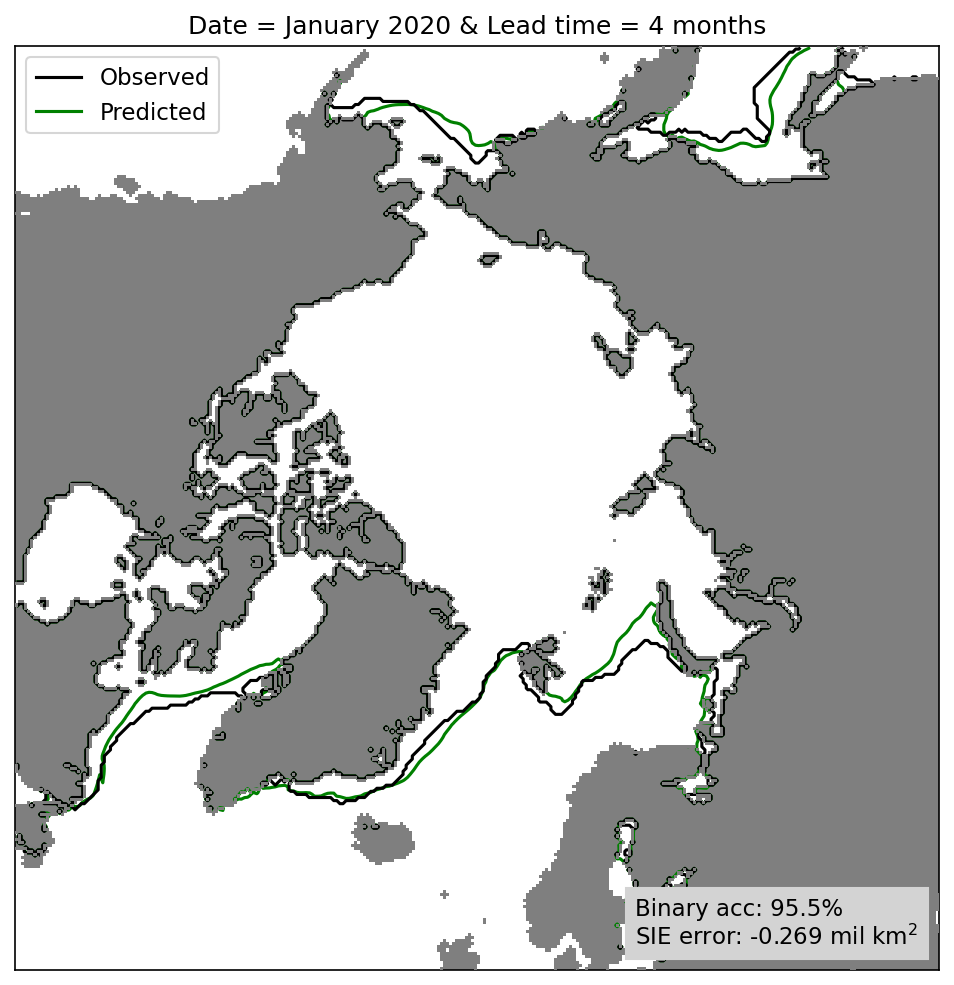
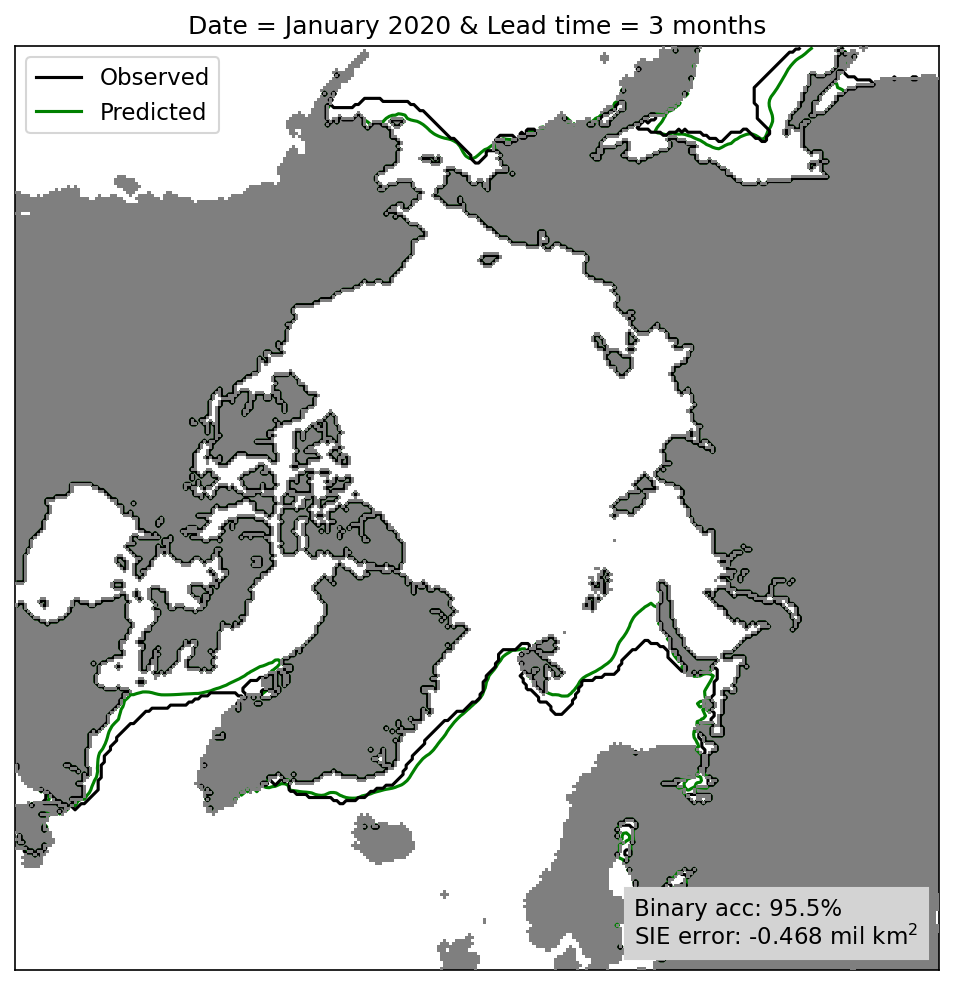
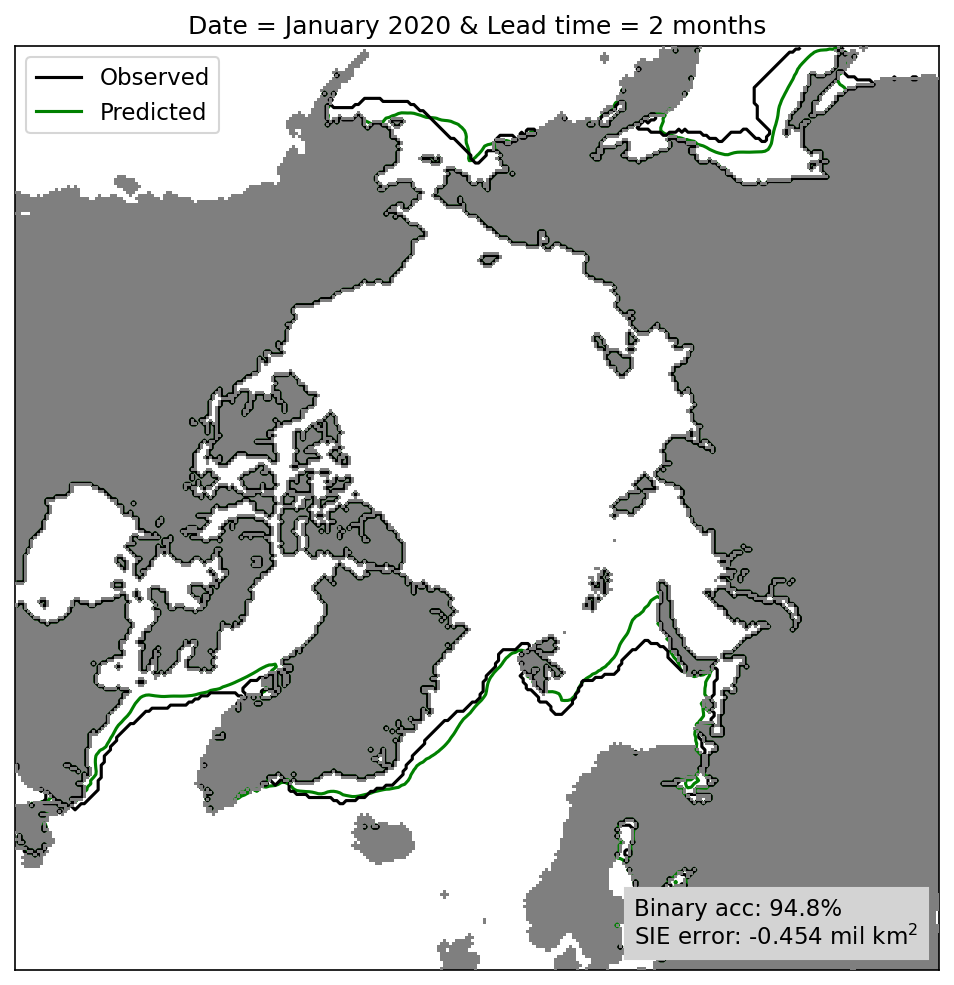
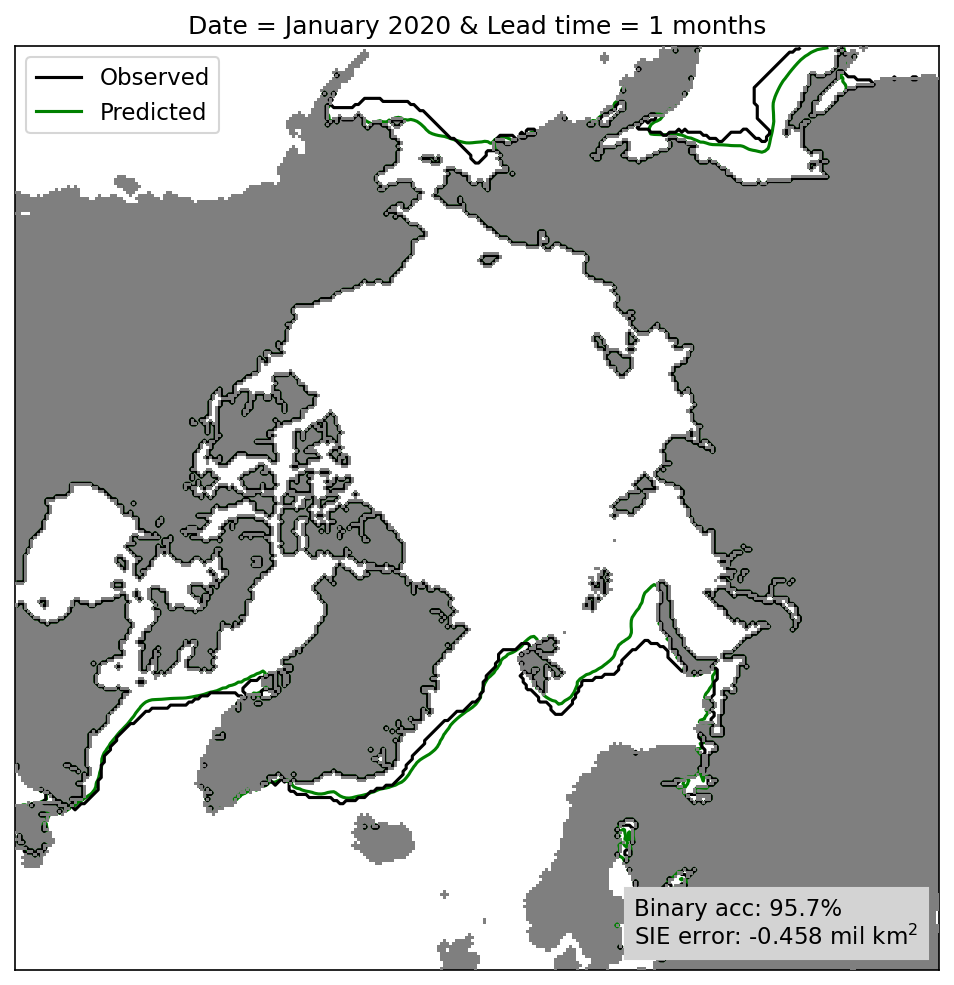

In [29]:
## set boundaries
mask = np.load(os.path.join(config['mask_data_folder'],
                            'active_grid_cell_mask_{}.npy'.format('03')))

min_0 = np.min(np.argwhere(mask)[:, 0])
max_0 = np.max(np.argwhere(mask)[:, 0])
mid_0 = np.mean((min_0, max_0)).astype(int)
min_1 = np.min(np.argwhere(mask)[:, 1])
max_1 = np.max(np.argwhere(mask)[:, 1])
mid_1 = np.mean((min_1, max_1)).astype(int)
max_diff = np.max([mid_0-min_0, mid_1-min_1])
max_diff *= .85  # Zoom in
max_diff = int(max_diff)
top = mid_0 - max_diff + 10
bot = mid_0 + max_diff + 10
left = mid_1 - max_diff
right = mid_1 + max_diff

## land and region masks
land_mask = np.load(os.path.join(config['mask_data_folder'], 'land_mask.npy'))
region_mask = np.load(os.path.join(config['mask_data_folder'], 'region_mask.npy'))

## define coastline and land layers
arr = region_mask == 13
coastline_rgba_arr = np.zeros((*arr.shape, 4))
coastline_rgba_arr[:, :, 3] = arr  # alpha channel
coastline_rgba_arr[:, :, :3] = .5  # black coastline
land_mask_rgba_arr = np.zeros((*arr.shape, 4))
land_mask_rgba_arr[:, :, 3] = land_mask  # alpha channel
land_mask_rgba_arr[:, :, :3] = .5  # gray land

## line colours
pred_ice_edge_rgb = 'green'
true_ice_edge_rgb = 'black'

## define plot function
@pn.depends(month_slider.param.value, lead_slider.param.value)
def plot_forecast(month, leadtime):
    tdate = pd.Timestamp(year,month_name.index(month)+1,1)

    fig0 = Figure(figsize=(8, 8))
    ax0 = fig0.subplots()
    FigureCanvas(fig0)  # not needed for mpl >= 3.1

    ax0.imshow(coastline_rgba_arr[top:bot, left:right, :], zorder=20)
    ax0.imshow(land_mask_rgba_arr[top:bot, left:right, :], zorder=1)

    icenet_sip = icenet_sip_da.sel(time=tdate, leadtime=leadtime, seed='ensemble').data
    ax0.contour(
        icenet_sip[top:bot, left:right],
        levels=[0.5],
        colors=[pred_ice_edge_rgb],
        zorder=1,
        linewidths=1.5,
    )

    groundtruth_sic = true_sic_da.sel(time=tdate)
    gt_img = (groundtruth_sic>0.15).data

    ax0.contour(
        gt_img[top:bot, left:right],
        levels=[0.5],
        colors=[true_ice_edge_rgb],
        zorder=1,
        linewidths=1.5
    )
    ax0.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    proxy = [plt.Line2D([0], [1], color=true_ice_edge_rgb),
                         plt.Line2D([0], [1], color=pred_ice_edge_rgb)]

    ax0.legend(proxy, ['Observed', 'Predicted'],
                          loc='upper left', fontsize=11)

    ax0.set_title(f'Date = {month} & Lead time = {leadtime} months')

    acc = results_df.loc['IceNet', 'ensemble', leadtime, tdate]['Binary accuracy']
    sie_err = results_df.loc['IceNet', 'ensemble', leadtime, tdate]['SIE error']

    Afont = {
        'backgroundcolor': 'lightgray',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

    t = AnchoredText('Binary acc: {:.1f}% \nSIE error: {:+.3f} mil km$^2$'.format(acc,sie_err/1e6), prop=Afont, loc='lower right', pad=0.5, borderpad=0.4, frameon=False)
    t = ax0.add_artist(t)
    t.zorder = 21

    return pn.pane.Matplotlib(fig0, tight=True, dpi=150)

plot_ie = pn.Row(
    plot_forecast,
    pn.Column(pn.Spacer(height=5), month_slider, pn.Spacer(height=15), lead_slider, background='#f0f0f0', sizing_mode="scale_both"),
    width_policy='fit', height_policy='max', 
)

plot_ie.embed()

### Model performance comparison

The figure below shows the mean binary accuracy versus lead time over the 12 forecasted dates for IceNet, SEAS5 and linear trend benchmark. We observe IceNet outperform SEAS5 and linear trend models at lead times of 2 months and beyond.

In [30]:
results_mean = results_df['Binary accuracy'].groupby(['Model','Ensemble member','Leadtime']).mean().reset_index()
results_mean = results_mean[results_mean['Ensemble member'].isin(['NA','ensemble'])]

plot_ba = results_mean.hvplot(x='Leadtime', y='Binary accuracy', by='Model',
                        label='Lead times comparison',
                        ylabel='Binary accuracy',
                        xlabel='Lead time (months)',
                        color=['#1f77b4', 'gray', '#d62728'])
plot_ba.opts(legend_position='top_right', **settings_lineplots)
plot_ba

:NdOverlay   [Model]
   :Curve   [Leadtime]   (Binary accuracy)

### Monthly performance comparison

Different to the previous plot, the following figure compares the performance of the three models from January to December in 2020 by seasonal lead time. We confirm IceNet’s ability of seasonal forecast of summer ice (August, September and October) at lead times of two months and beyond outperforming both SEAS5 and the linear trend.

We also observe SEAS5 outperforms IceNet at a 1-month lead time over time, except in October. According to the Nature communications paper, this is likely because IceNet only receives monthly averages as input, smearing the weather phenomena and initial conditions that dominate predictability on such short timescales.

In [31]:
lead_slider = pn.widgets.IntSlider(name="Lead time (months)", start=1, end=4, step=1, width=150)

results_plot = results_df.reset_index()

formatter = DatetimeTickFormatter(months='%b')

@pn.depends(lead_slider.param.value)
def plot_month(leadtime):

    results_lt = results_plot[results_plot.Leadtime==leadtime]
    plot_ba_month = results_lt.hvplot(x='Forecast date',
                                y='Binary accuracy',
                                by='Model',
                                label='Monthly comparison',
                                ylabel='Binary accuracy',
                                xlabel='Forecast month',
                                color=['#1f77b4', 'gray', '#d62728'],
                                xformatter=formatter)

    return plot_ba_month.opts(legend_position='bottom_left', **settings_lineplots)

plot_month = pn.Row(
    plot_month,
    pn.Column(pn.Spacer(height=5), lead_slider, background='#f0f0f0'),
    width_policy='max', height_policy='max'
)

plot_month.embed()

## Summary

This notebook has demonstrated the use of:

* A custom dataloader, `IceNetDataLoader`, to conveniently dictate which variables are input to the networks, which climate simulations are used for pre-training, and how far ahead to forecast.
* How to append, filter, and manipulate new forecast results using `pandas`.
* `matplotlib` framed into a `panels` dashboard to visualise the IceNet forecast within the modelled period and four lead times.
* `hvplot` to plot time series data for comparing the performance of IceNet predictions against ECMWF SEAS5 physics-based sea ice concentration and a linear trend statistical benchmark.
 
The IceNet's Nature Communications paper [*Seasonal Arctic sea ice forecasting with probabilistic deep learning*](https://www.nature.com/articles/s41467-021-25257-4) provides
further information of other key aspects e.g. variable importance, model calibration, etc. which for sake of simplicity  are not covered in the demonstrator.

## Citing this Notebook

Please see [CITATION.cff](https://github.com/eds-book-gallery/ac327c3a-5264-40a2-8c6e-1e8d7c4b37ef/blob/main/CITATION.cff) for the full citation information. The citation file can be exported to APA or BibTex formats (learn more [here](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-citation-files)).

## Additional information
**Codebase**: `IceNet` 1.0.0 with commit <mark>[9d69ad7](https://github.com/tom-andersson/icenet-paper/compare/v1.0.0...main)</mark>

**License**: The code in this notebook is licensed under the MIT License. The Environmental Data Science book is licensed under the Creative Commons by Attribution 4.0 license. See further details [here](https://github.com/alan-turing-institute/environmental-ds-book/blob/master/LICENSE.md).

**Contact**: If you have any suggestion or report an issue with this notebook, feel free to [create an issue](https://github.com/alan-turing-institute/environmental-ds-book/issues/new/choose) or send a direct message to [environmental.ds.book@gmail.com](mailto:environmental.ds.book@gmail.com).

In [32]:
from datetime import date

print('Notebook repository version: v1.0.4')
print(f'Last tested: {date.today()}')

Notebook repository version: v1.0.4
Last tested: 2024-03-12


## Outputs registration
The cell below is dedicated to save the notebook outputs for registering them into a Zenodo repository curated by the Environmental DS book.

In [33]:
outputs = {
    'static_tables': {
        'filenames': ['table_monthlyperformance'],
        'data':[results_df]},
    'interactive_figures_hvplot': {
        'filenames': ['interactive_modelperformance'],
        'data':[plot_ba]},
    'interactive_figures_panel': {
        'filenames': ['interactive_iceedge', 'interactive_monthlyperformance'],
        'data':[plot_ie, plot_month]},
}

#save static tables
if len(outputs['static_tables']['filenames']) > 0:
    [data.to_csv(os.path.join(notebook_folder,outputs['static_tables']['filenames'][x] + '.csv')) for x, data in enumerate(outputs['static_tables']['data'])]

#save hvplot interactive figures
if len(outputs['interactive_figures_hvplot']['filenames']) > 0:
    [hvplot.save(data, os.path.join(notebook_folder,outputs['interactive_figures_hvplot']['filenames'][x]  + '.html')) for x, data in enumerate(outputs['interactive_figures_hvplot']['data'])]
    
#save panel interactive figures
if len(outputs['interactive_figures_panel']['filenames']) > 0:
    [data.save(os.path.join(notebook_folder,outputs['interactive_figures_panel']['filenames'][x]  + '.html'), embed=True) for x, data in enumerate(outputs['interactive_figures_panel']['data'])]